In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14453497738175562891
]


In [2]:
import keras
import tensorflow as tf


config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

Using TensorFlow backend.


In [1]:
from keras.utils import np_utils
from keras.layers import Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization,Dense,Activation
from keras import backend as k
from keras.models import Sequential
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
batch_size = 128
out_dim = 10
nb_epochs = 12
img_rows,img_cols = 28,28

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = x_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [5]:
X_train = X_train/255
X_test = X_test/255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

## Model with 3 by 3 kernels or filters.

### Model 1 with 3 CNN layers

In [7]:
model_1 = Sequential()
model_1.add(Conv2D(96,kernel_size=(3,3),padding='same',input_shape=input_shape))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.5))
model_1.add(Conv2D(64,kernel_size = (3,3),padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size =(2,2)))
model_1.add(Dropout(0.5))
model_1.add(Conv2D(32,kernel_size=(3,3),padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_1.add(Dropout(0.5))
model_1.add(Flatten())
model_1.add(Dense(64))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(out_dim,activation = 'softmax'))
model_1.summary()

W0825 09:29:22.765383  7884 deprecation_wrapper.py:119] From C:\Users\patha\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 09:29:23.070569  7884 deprecation_wrapper.py:119] From C:\Users\patha\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 09:29:23.076552  7884 deprecation_wrapper.py:119] From C:\Users\patha\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 09:29:23.111462  7884 deprecation_wrapper.py:119] From C:\Users\patha\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0825 09:29:23.115463  7884 deprecation_wrapper.py:119] 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 96)        960       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 96)        384       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        55360     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
__________

In [8]:
model_1.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model_1.fit(X_train,y_train,batch_size=batch_size,epochs=nb_epochs,validation_data=(X_test,y_test))
score = model_1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0825 09:29:33.614658  7884 deprecation_wrapper.py:119] From C:\Users\patha\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0825 09:29:33.735855  7884 deprecation.py:323] From C:\Users\patha\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 199s 3ms/step - loss: 1.0261 - acc: 0.6707 - val_loss: 0.2258 - val_acc: 0.9413
Epoch 2/12
60000/60000 [==============================] - 194s 3ms/step - loss: 0.3607 - acc: 0.8943 - val_loss: 0.0904 - val_acc: 0.9747
Epoch 3/12
60000/60000 [==============================] - 194s 3ms/step - loss: 0.2461 - acc: 0.9276 - val_loss: 0.0845 - val_acc: 0.9749
Epoch 4/12
60000/60000 [==============================] - 194s 3ms/step - loss: 0.1996 - acc: 0.9405 - val_loss: 0.0482 - val_acc: 0.9837
Epoch 5/12
60000/60000 [==============================] - 193s 3ms/step - loss: 0.1708 - acc: 0.9495 - val_loss: 0.0409 - val_acc: 0.9873
Epoch 6/12
60000/60000 [==============================] - 193s 3ms/step - loss: 0.1627 - acc: 0.9523 - val_loss: 0.0414 - val_acc: 0.9865
Epoch 7/12
60000/60000 [==============================] - 193s 3ms/step - loss: 0.1478 - acc: 0.9576 - val_loss: 0.0363 - 

# Weights Distribution in Each CNN Layers

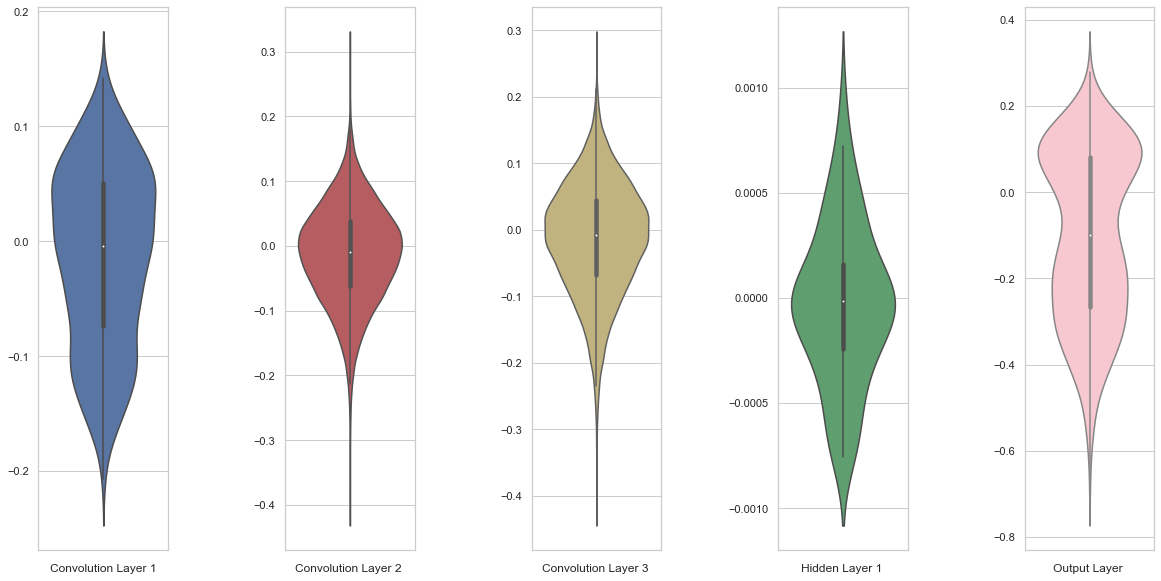

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_1.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
h1_w = w_after[19].flatten().reshape(-1,1)
out_2 = w_after[24].flatten().reshape(-1,1)
sns.set(style='whitegrid',palette='RdBu')
fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(1, 5, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(1, 5, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(1, 5, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='g')
plt.xlabel('Hidden Layer 1 ')

plt.subplot(1, 5, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w, color='pink')
plt.xlabel('Output Layer ')

plt.show()

### Model 1 with sigmoid activation layer

In [6]:
model_1 = Sequential()
model_1.add(Conv2D(96,kernel_size=(3,3),padding='same',input_shape=input_shape,kernel_initializer = 'glorot_uniform'))
model_1.add(BatchNormalization())
model_1.add(Activation('sigmoid'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(64,kernel_size = (3,3),padding='same',kernel_initializer = 'glorot_uniform'))
model_1.add(BatchNormalization())
model_1.add(Activation('sigmoid'))
model_1.add(MaxPooling2D(pool_size =(2,2)))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(32,kernel_size=(3,3),padding='same',kernel_initializer = 'glorot_uniform'))
model_1.add(BatchNormalization())
model_1.add(Activation('sigmoid'))
model_1.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_1.add(Dropout(0.2))
model_1.add(Flatten())
model_1.add(Dense(64,kernel_initializer = 'glorot_uniform'))
model_1.add(BatchNormalization())
model_1.add(Activation('sigmoid'))
model_1.add(Dropout(0.2))
model_1.add(Dense(out_dim,activation = 'softmax'))
model_1.summary()

W0826 10:56:00.857348 23336 deprecation_wrapper.py:119] From C:\Users\patha\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 10:56:00.933397 23336 deprecation_wrapper.py:119] From C:\Users\patha\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 10:56:00.938510 23336 deprecation_wrapper.py:119] From C:\Users\patha\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0826 10:56:00.963576 23336 deprecation_wrapper.py:119] From C:\Users\patha\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0826 10:56:00.964574 23336 deprecation_wrapper.py:119] 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 96)        960       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 96)        384       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        55360     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
__________

In [10]:
from keras.optimizers import SGD
sgd = SGD(lr = 0.01,decay=1e-4,momentum=0.90,nesterov = True)
model_1.compile(loss = 'categorical_crossentropy',optimizer = sgd,metrics = ['accuracy'])
model_1.fit(X_train,y_train,batch_size=batch_size,epochs=nb_epochs,validation_data=(X_test,y_test))
score = model_1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0826 11:12:27.698462 23336 deprecation_wrapper.py:119] From C:\Users\patha\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0826 11:12:27.843074 23336 deprecation.py:323] From C:\Users\patha\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 198s 3ms/step - loss: 1.9369 - acc: 0.3211 - val_loss: 1.0569 - val_acc: 0.6987
Epoch 2/12
60000/60000 [==============================] - 201s 3ms/step - loss: 1.0784 - acc: 0.6615 - val_loss: 0.5644 - val_acc: 0.8662
Epoch 3/12
60000/60000 [==============================] - 199s 3ms/step - loss: 0.7056 - acc: 0.7842 - val_loss: 0.3160 - val_acc: 0.9232
Epoch 4/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.5110 - acc: 0.8441 - val_loss: 0.2223 - val_acc: 0.9425
Epoch 5/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.4094 - acc: 0.8761 - val_loss: 0.1802 - val_acc: 0.9486
Epoch 6/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.3518 - acc: 0.8939 - val_loss: 0.1564 - val_acc: 0.9541
Epoch 7/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.3144 - acc: 0.9030 - val_loss: 0.1376 - 

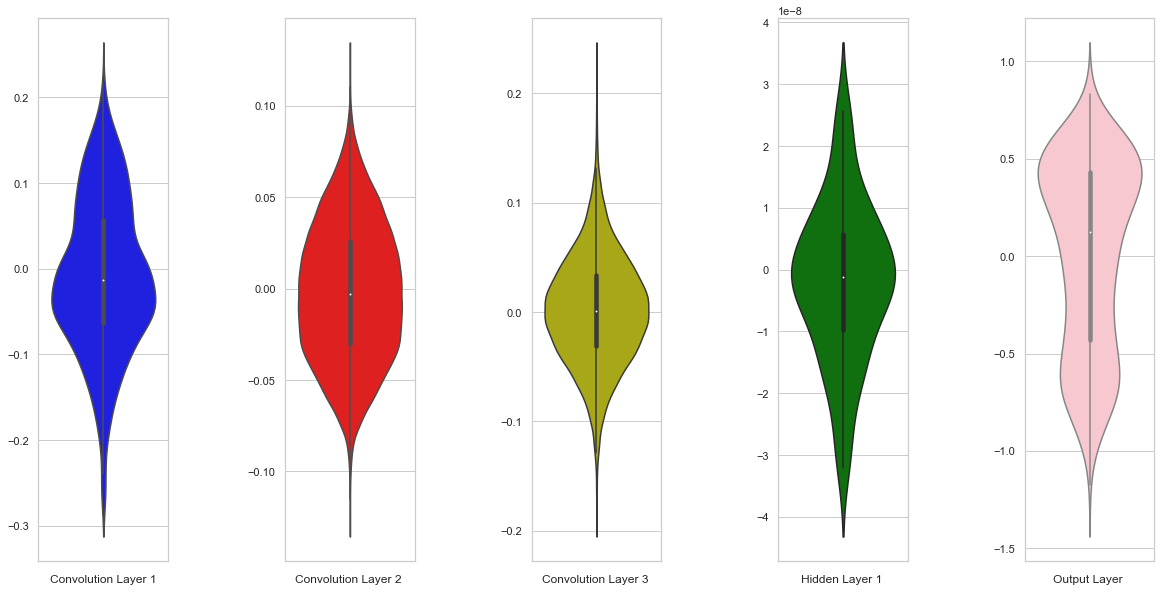

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_1.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
h1_w = w_after[19].flatten().reshape(-1,1)
out_w = w_after[24].flatten().reshape(-1,1)
sns.set(style='whitegrid',palette='RdBu')
fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(1, 5, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(1, 5, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(1, 5, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='g')
plt.xlabel('Hidden Layer 1 ')

plt.subplot(1, 5, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w, color='pink')
plt.xlabel('Output Layer ')

plt.show()

### Model 2 with 5 CNN layers

In [88]:
model_2 = Sequential()
model_2.add(Conv2D(16,kernel_size=(3,3),padding='same',input_shape=input_shape,kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.5))
model_2.add(Conv2D(32,kernel_size = (3,3),padding='valid',kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
#model_2.add(MaxPooling2D(pool_size =(2,2)))
model_2.add(Dropout(0.5))
model_2.add(Conv2D(32,kernel_size=(3,3),padding='same',kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.5))
model_2.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
#model_2.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_2.add(Dropout(0.5))
model_2.add(Conv2D(96,kernel_size = (3,3),padding = 'same',kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.5))
model_2.add(Flatten())
model_2.add(Dense(64,kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(out_dim,activation = 'softmax'))
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
activation_17 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
batch_normalization_18 (Batc (None, 12, 12, 32)        128       
__________

In [89]:
model_2.compile(loss = 'categorical_crossentropy',optimizer = 'adadelta',metrics = ['accuracy'])
result = model_2.fit(X_train,y_train,batch_size=batch_size,epochs=12,validation_data=(X_test,y_test))
score = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 75s 1ms/step - loss: 1.5499 - acc: 0.4738 - val_loss: 1.2353 - val_acc: 0.5987
Epoch 2/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.6294 - acc: 0.7987 - val_loss: 0.3567 - val_acc: 0.8862
Epoch 3/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.4305 - acc: 0.8694 - val_loss: 0.1993 - val_acc: 0.9344
Epoch 4/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.3463 - acc: 0.8972 - val_loss: 0.1258 - val_acc: 0.9598
Epoch 5/12
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2982 - acc: 0.9125 - val_loss: 0.1085 - val_acc: 0.9668
Epoch 6/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2629 - acc: 0.9234 - val_loss: 0.0921 - val_acc: 0.9711
Epoch 7/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2366 - acc: 0.9315 - val_loss: 0.0720 - val_acc

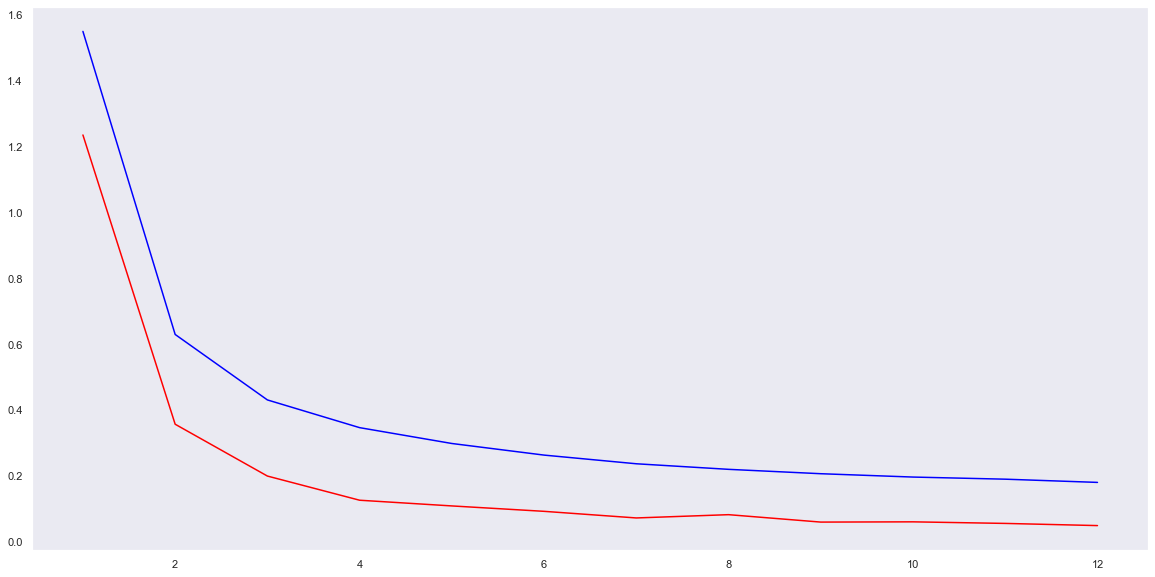

In [98]:
import numpy as np
train_loss = result.history['val_loss'] 
val_loss = result.history['loss']
epochs = list(np.arange(1,nb_epochs+1))
plt.figure(figsize = (20,10))
sns.lineplot(x = epochs,y = train_loss,color = 'red')
sns.lineplot(x = epochs,y = val_loss,color = 'blue')
plt.grid()

### Weights Distribution in Each CNN Layers

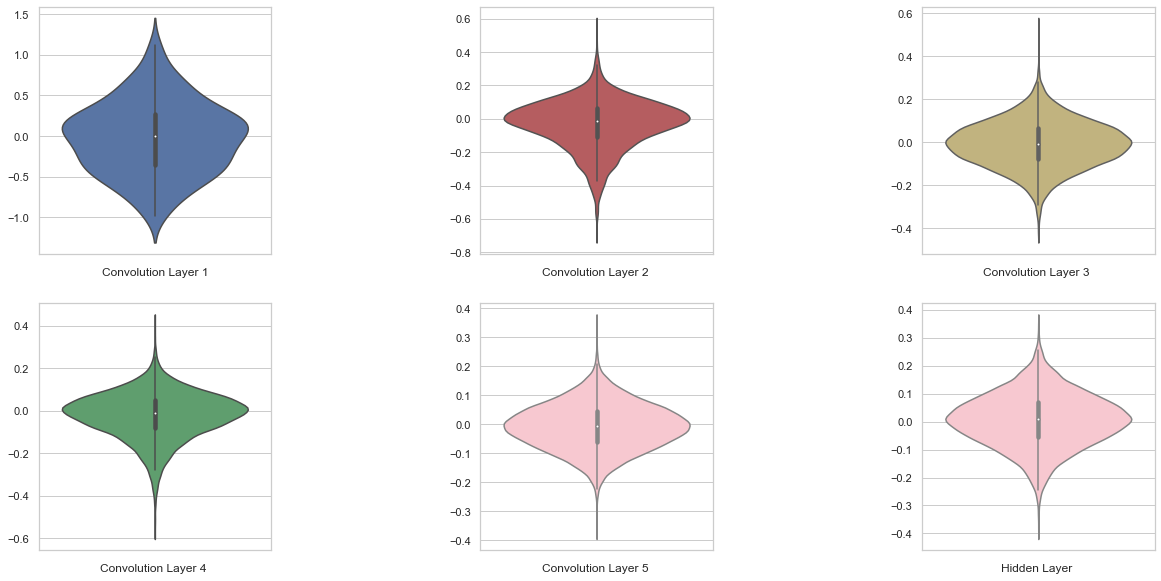

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_2.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
C4_w = w_after[18].flatten().reshape(-1,1)
C5_w = w_after[24].flatten().reshape(-1,1)
h1_w = w_after[30].flatten().reshape(-1,1)
out_w = w_after[36].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(2, 3, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(2, 3, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(2, 3, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C4_w, color='g')
plt.xlabel('Convolution Layer 4 ')

plt.subplot(2, 3, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C5_w, color='pink')
plt.xlabel('Convolution Layer 5 ')

plt.subplot(2, 3, 6)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='pink')
plt.xlabel('Hidden Layer ')
plt.show()

In [16]:
model_2 = Sequential()
model_2.add(Conv2D(16,kernel_size=(3,3),padding='same',input_shape=input_shape,kernel_initializer='glorot_uniform'))
model_2.add(BatchNormalization())
model_2.add(Activation('sigmoid'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.5))
model_2.add(Conv2D(32,kernel_size = (3,3),padding='valid',kernel_initializer='glorot_uniform'))
model_2.add(BatchNormalization())
model_2.add(Activation('sigmoid'))
#model_2.add(MaxPooling2D(pool_size =(2,2)))
model_2.add(Dropout(0.5))
model_2.add(Conv2D(32,kernel_size=(3,3),padding='same',kernel_initializer='glorot_uniform'))
model_2.add(BatchNormalization())
model_2.add(Activation('sigmoid'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.5))
model_2.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',kernel_initializer='glorot_uniform'))
model_2.add(BatchNormalization())
model_2.add(Activation('sigmoid'))
#model_2.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_2.add(Dropout(0.5))
model_2.add(Conv2D(64,kernel_size = (3,3),padding = 'same',kernel_initializer='glorot_uniform'))
model_2.add(BatchNormalization())
model_2.add(Activation('sigmoid'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.5))
model_2.add(Flatten())
model_2.add(Dense(24,kernel_initializer='glorot_uniform'))
model_2.add(BatchNormalization())
model_2.add(Activation('sigmoid'))
model_2.add(Dropout(0.5))
model_2.add(Dense(out_dim,activation = 'softmax'))
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
batch_normalization_12 (Batc (None, 12, 12, 32)        128       
__________

In [17]:
from keras.optimizers import SGD
sgd = SGD(lr = 0.01,decay=1e-4,momentum=0.90,nesterov = True)
model_2.compile(loss = 'categorical_crossentropy',optimizer = sgd,metrics = ['accuracy'])
result = model_2.fit(X_train,y_train,batch_size=batch_size,epochs=nb_epochs,validation_data=(X_test,y_test))
score = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 69s 1ms/step - loss: 2.3578 - acc: 0.1022 - val_loss: 2.3015 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 56s 927us/step - loss: 2.3067 - acc: 0.1050 - val_loss: 2.3020 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 60s 999us/step - loss: 2.3035 - acc: 0.1071 - val_loss: 2.3015 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 59s 986us/step - loss: 2.3032 - acc: 0.1090 - val_loss: 2.3020 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 58s 974us/step - loss: 2.3035 - acc: 0.1073 - val_loss: 2.3017 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 63s 1ms/step - loss: 2.3032 - acc: 0.1072 - val_loss: 2.3019 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 64s 1ms/step - loss: 2.3031 - acc: 0.1098 - val_loss: 2.3027 -

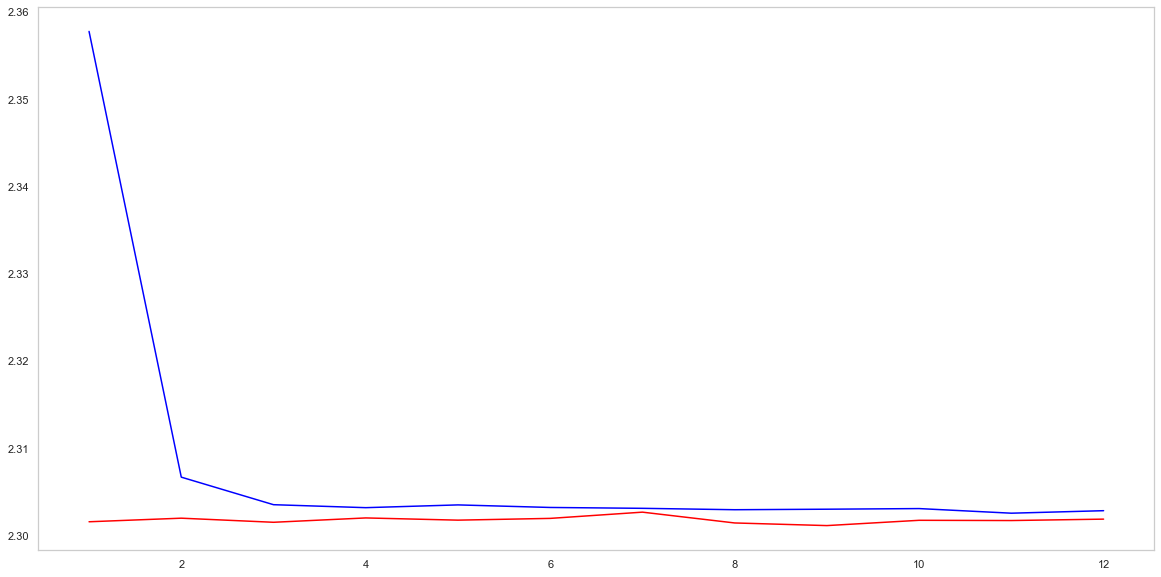

In [18]:
import numpy as np
train_loss = result.history['val_loss'] 
val_loss = result.history['loss']
epochs = list(np.arange(1,nb_epochs+1))
plt.figure(figsize = (20,10))
sns.lineplot(x = epochs,y = train_loss,color = 'red')
sns.lineplot(x = epochs,y = val_loss,color = 'blue')
plt.grid()

### Weights Distribution in Each CNN Layers

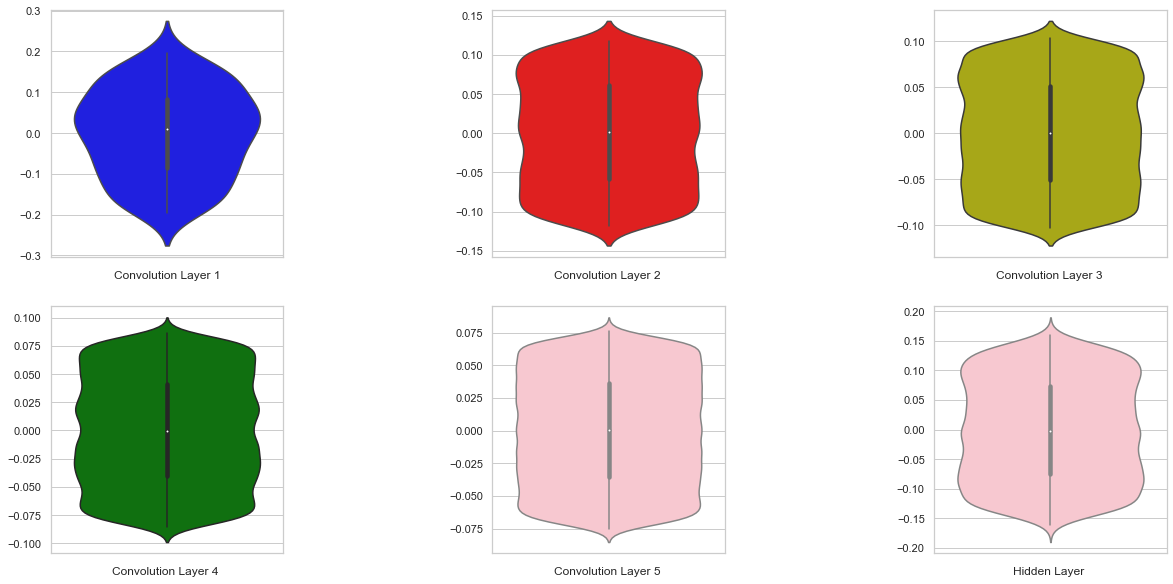

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_2.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
C4_w = w_after[18].flatten().reshape(-1,1)
C5_w = w_after[24].flatten().reshape(-1,1)
h1_w = w_after[30].flatten().reshape(-1,1)
out_w = w_after[36].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(2, 3, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(2, 3, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(2, 3, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C4_w, color='g')
plt.xlabel('Convolution Layer 4 ')

plt.subplot(2, 3, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C5_w, color='pink')
plt.xlabel('Convolution Layer 5 ')

plt.subplot(2, 3, 6)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='pink')
plt.xlabel('Hidden Layer ')
plt.show()

In [21]:
#from keras.optimizers import SGD
#sgd = SGD(lr = 0.01,decay=1e-4,momentum=0.90,nesterov = True)
model_2.compile(loss = 'categorical_crossentropy',optimizer = 'adadelta',metrics = ['accuracy'])
result = model_2.fit(X_train,y_train,batch_size=batch_size,epochs=nb_epochs,validation_data=(X_test,y_test))
score = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 72s 1ms/step - loss: 2.3027 - acc: 0.1098 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 60s 993us/step - loss: 2.3026 - acc: 0.1096 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 59s 984us/step - loss: 2.3028 - acc: 0.1085 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 59s 978us/step - loss: 2.3025 - acc: 0.1090 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 59s 985us/step - loss: 2.3026 - acc: 0.1087 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 59s 991us/step - loss: 2.3025 - acc: 0.1087 - val_loss: 2.3018 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 60s 996us/step - loss: 2.3026 - acc: 0.1104 - val_loss: 2.30

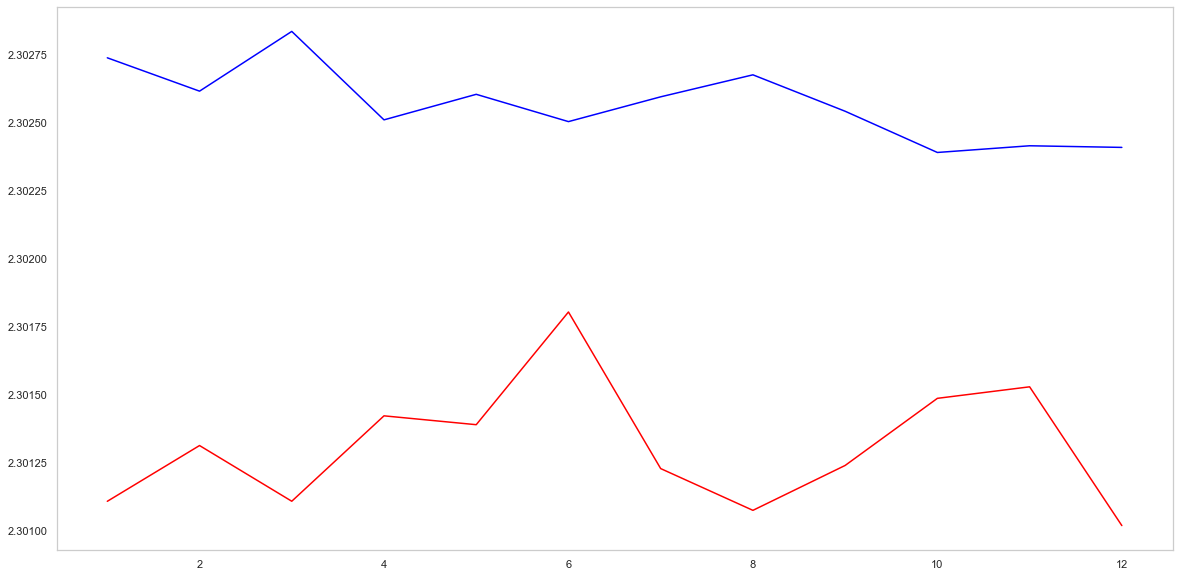

In [22]:
import numpy as np
train_loss = result.history['val_loss'] 
val_loss = result.history['loss']
epochs = list(np.arange(1,nb_epochs+1))
plt.figure(figsize = (20,10))
sns.lineplot(x = epochs,y = train_loss,color = 'red')
sns.lineplot(x = epochs,y = val_loss,color = 'blue')
plt.grid()

### Weights Distribution In Each CNN Layers

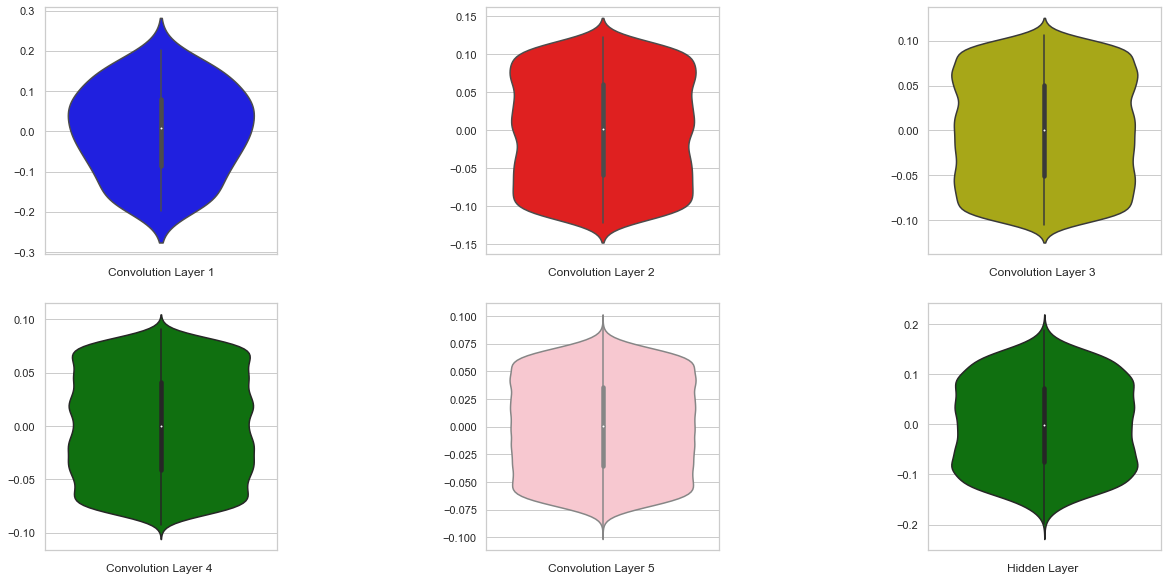

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_2.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
C4_w = w_after[18].flatten().reshape(-1,1)
C5_w = w_after[24].flatten().reshape(-1,1)
h1_w = w_after[30].flatten().reshape(-1,1)
out_w = w_after[36].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(2, 3, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(2, 3, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(2, 3, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C4_w, color='g')
plt.xlabel('Convolution Layer 4 ')

plt.subplot(2, 3, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C5_w, color='pink')
plt.xlabel('Convolution Layer 5 ')

plt.subplot(2, 3, 6)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='g')
plt.xlabel('Hidden Layer ')
plt.show()

### Model 3 with 7 CNN layers

In [122]:
model_3 = Sequential()
model_3.add(Conv2D(16,kernel_size=(3,3),padding='valid',input_shape=input_shape,kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
#model_3.add(MaxPooling2D(pool_size=(2,2),padding = 'same'))
model_3.add(Dropout(0.5))
model_3.add(Conv2D(16,kernel_size = (3,3),padding='valid',kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size =(2,2)))
model_3.add(Dropout(0.5))
model_3.add(Conv2D(32,kernel_size=(3,3),padding='same',kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
#model_3.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_3.add(Dropout(0.5))
model_3.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
#model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))
model_3.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))
model_3.add(Conv2D(64,kernel_size = (3,3),padding = 'same',kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
#model_3.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_3.add(Dropout(0.5))
model_3.add(Conv2D(64,kernel_size = (3,3),padding = 'same',kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))
model_3.add(Flatten())
model_3.add(Dense(128,kernel_initializer='he_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(out_dim,activation = 'softmax'))
model_3.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_31 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_31 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_32 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_32 (Activation)   (None, 24, 24, 16)        0         
__________

In [123]:
model_3.compile(loss = 'categorical_crossentropy',optimizer = 'adadelta',metrics = ['accuracy'])
result = model_3.fit(X_train,y_train,batch_size=batch_size,epochs=12,validation_data=(X_test,y_test))
score = model_3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 90s 1ms/step - loss: 1.7270 - acc: 0.4045 - val_loss: 3.0717 - val_acc: 0.2675
Epoch 2/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.7519 - acc: 0.7491 - val_loss: 1.2310 - val_acc: 0.6194
Epoch 3/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.5242 - acc: 0.8339 - val_loss: 0.6130 - val_acc: 0.8036
Epoch 4/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.4056 - acc: 0.8760 - val_loss: 0.4241 - val_acc: 0.8703
Epoch 5/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.3303 - acc: 0.8994 - val_loss: 0.2549 - val_acc: 0.9212
Epoch 6/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2918 - acc: 0.9119 - val_loss: 0.2007 - val_acc: 0.9392
Epoch 7/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2582 - acc: 0.9233 - val_loss: 0.1782 - val_acc

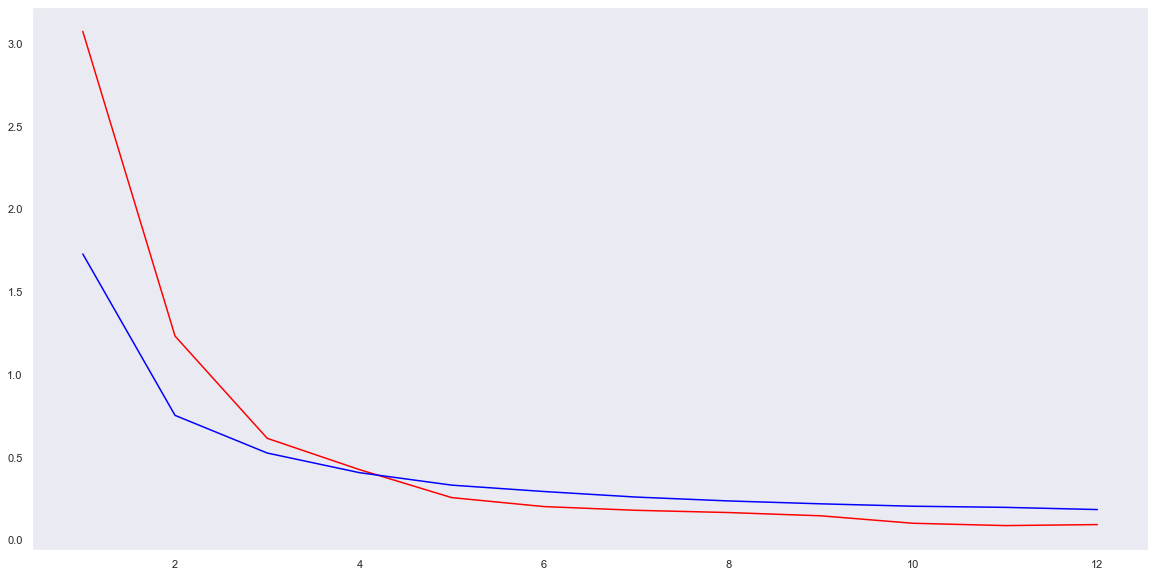

In [130]:
import numpy as np
train_loss = result.history['val_loss'] 
val_loss = result.history['loss']
epochs = list(np.arange(1,nb_epochs+1))
plt.figure(figsize = (20,10))
sns.lineplot(x = epochs,y = train_loss,color = 'red')
sns.lineplot(x = epochs,y = val_loss,color = 'blue')
plt.grid()

# Weights Distribution in Each CNN Layers

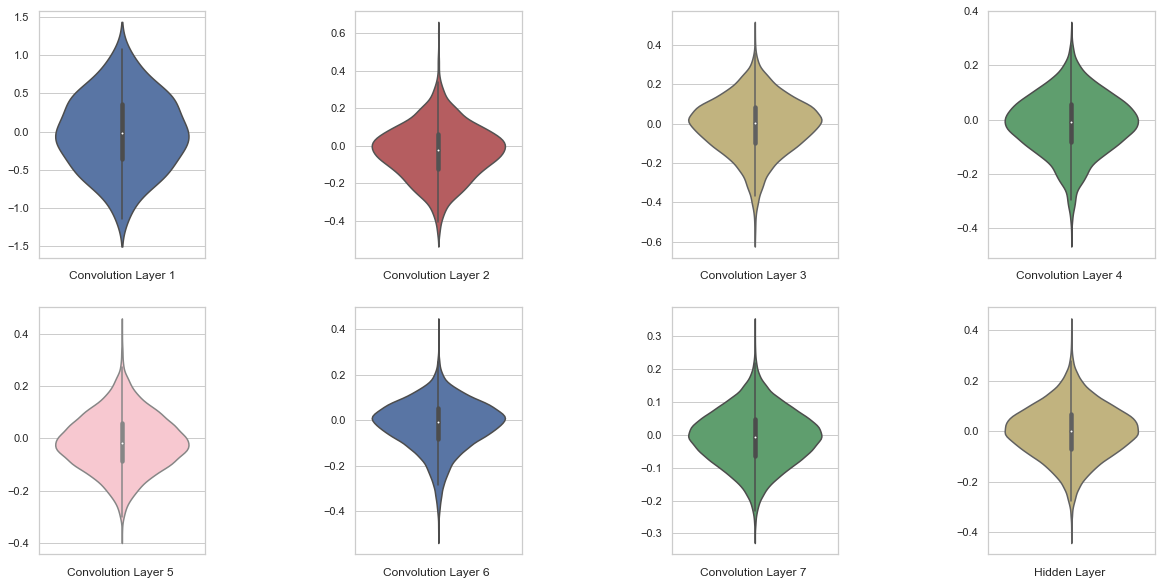

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_3.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
C4_w = w_after[18].flatten().reshape(-1,1)
C5_w = w_after[24].flatten().reshape(-1,1)
C6_w = w_after[30].flatten().reshape(-1,1)
C7_w = w_after[36].flatten().reshape(-1,1)
h1_w = w_after[42].flatten().reshape(-1,1)
out_w = w_after[48].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(2, 4, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(2, 4, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(2, 4, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(2, 4, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C4_w, color='g')
plt.xlabel('Convolution Layer 4 ')

plt.subplot(2, 4, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C5_w, color='pink')
plt.xlabel('Convolution Layer 5 ')

plt.subplot(2, 4, 6)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C6_w, color='b')
plt.xlabel('Convolution Layer 6 ')
plt.subplot(2, 4, 7)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C7_w, color='g')
plt.xlabel('Convolution Layer 7 ')

plt.subplot(2, 4, 8)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='y')
plt.xlabel('Hidden Layer ')
plt.show()

### Model 3 with 7 CNN layers and with sigmoid as an activation function.

In [26]:
model_3 = Sequential()
model_3.add(Conv2D(16,kernel_size=(3,3),padding='valid',input_shape=input_shape,kernel_initializer='glorot_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('sigmoid'))
#model_3.add(MaxPooling2D(pool_size=(2,2),padding = 'same'))
model_3.add(Dropout(0.5))
model_3.add(Conv2D(16,kernel_size = (3,3),padding='valid',kernel_initializer='glorot_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('sigmoid'))
model_3.add(MaxPooling2D(pool_size =(2,2)))
model_3.add(Dropout(0.5))
model_3.add(Conv2D(32,kernel_size=(3,3),padding='same',kernel_initializer='glorot_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('sigmoid'))
#model_3.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_3.add(Dropout(0.5))
model_3.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',kernel_initializer='glorot_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('sigmoid'))
#model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))
model_3.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',kernel_initializer='glorot_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('sigmoid'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))
model_3.add(Conv2D(64,kernel_size = (3,3),padding = 'same',kernel_initializer='glorot_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('sigmoid'))
#model_3.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_3.add(Dropout(0.5))
model_3.add(Conv2D(64,kernel_size = (3,3),padding = 'same',kernel_initializer='glorot_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('sigmoid'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))
model_3.add(Flatten())
model_3.add(Dense(128,kernel_initializer='glorot_normal'))
model_3.add(BatchNormalization())
model_3.add(Activation('sigmoid'))
model_3.add(Dropout(0.5))
model_3.add(Dense(out_dim,activation = 'softmax'))
model_3.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_25 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_26 (Activation)   (None, 24, 24, 16)        0         
__________

In [27]:
model_3.compile(loss = 'categorical_crossentropy',optimizer = 'adadelta',metrics = ['accuracy'])
result = model_3.fit(X_train,y_train,batch_size=batch_size,epochs=12,validation_data=(X_test,y_test))
score = model_3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 138s 2ms/step - loss: 2.4424 - acc: 0.0999 - val_loss: 2.3036 - val_acc: 0.1009
Epoch 2/12
60000/60000 [==============================] - 123s 2ms/step - loss: 2.3376 - acc: 0.1013 - val_loss: 2.3034 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 127s 2ms/step - loss: 2.3149 - acc: 0.1029 - val_loss: 2.3031 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 121s 2ms/step - loss: 2.3095 - acc: 0.1040 - val_loss: 2.3033 - val_acc: 0.1028
Epoch 5/12
60000/60000 [==============================] - 123s 2ms/step - loss: 2.3079 - acc: 0.1035 - val_loss: 2.3022 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 125s 2ms/step - loss: 2.3075 - acc: 0.1033 - val_loss: 2.3030 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 128s 2ms/step - loss: 2.3077 - acc: 0.1049 - val_loss: 2.3044 - 

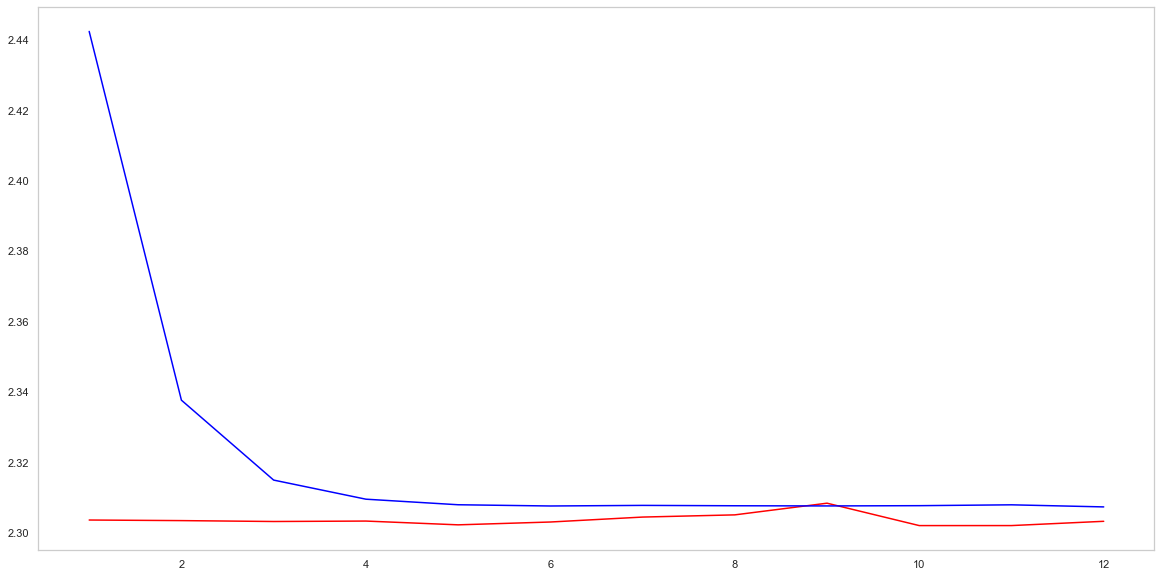

In [28]:
import numpy as np
train_loss = result.history['val_loss'] 
val_loss = result.history['loss']
epochs = list(np.arange(1,nb_epochs+1))
plt.figure(figsize = (20,10))
sns.lineplot(x = epochs,y = train_loss,color = 'red')
sns.lineplot(x = epochs,y = val_loss,color = 'blue')
plt.grid()

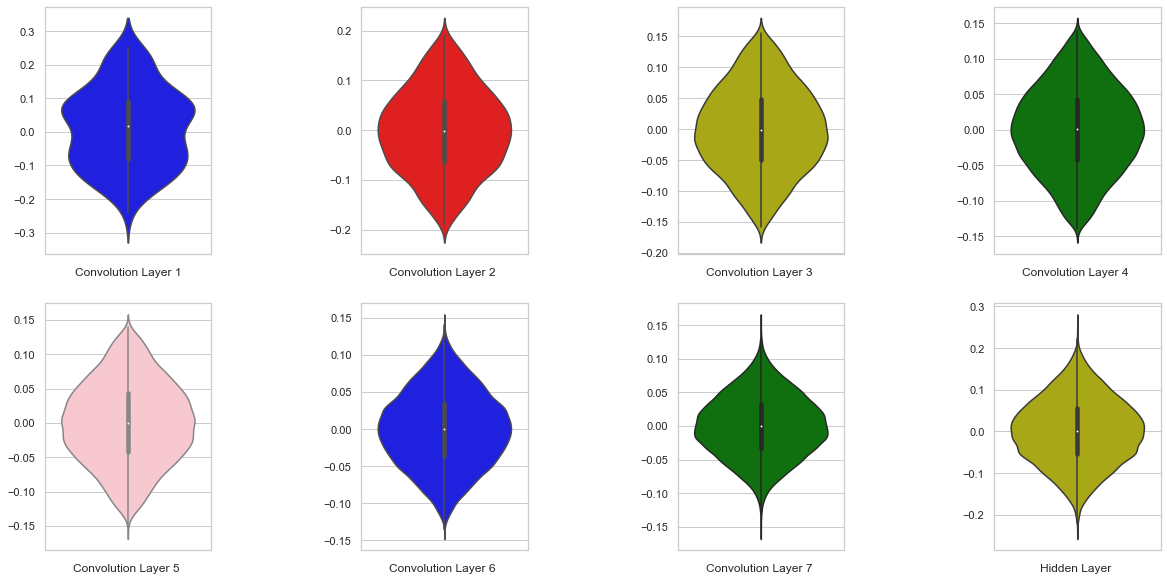

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_3.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
C4_w = w_after[18].flatten().reshape(-1,1)
C5_w = w_after[24].flatten().reshape(-1,1)
C6_w = w_after[30].flatten().reshape(-1,1)
C7_w = w_after[36].flatten().reshape(-1,1)
h1_w = w_after[42].flatten().reshape(-1,1)
out_w = w_after[48].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(2, 4, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(2, 4, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(2, 4, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(2, 4, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C4_w, color='g')
plt.xlabel('Convolution Layer 4 ')

plt.subplot(2, 4, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C5_w, color='pink')
plt.xlabel('Convolution Layer 5 ')

plt.subplot(2, 4, 6)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C6_w, color='b')
plt.xlabel('Convolution Layer 6 ')
plt.subplot(2, 4, 7)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C7_w, color='g')
plt.xlabel('Convolution Layer 7 ')

plt.subplot(2, 4, 8)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='y')
plt.xlabel('Hidden Layer ')
plt.show()

## Models with 5 by 5 kernels or filters

### Model with 3 CNN Layers

In [145]:
model_1_5 = Sequential()
model_1_5.add(Conv2D(16,kernel_size=(5,5),padding='same',input_shape=input_shape,kernel_initializer='he_uniform'))
model_1_5.add(BatchNormalization())
model_1_5.add(Activation('relu'))
model_1_5.add(MaxPooling2D(pool_size=(2,2)))
model_1_5.add(Dropout(0.5))
model_1_5.add(Conv2D(32,kernel_size = (5,5),padding='same',kernel_initializer='he_uniform'))
model_1_5.add(BatchNormalization())
model_1_5.add(Activation('relu'))
model_1_5.add(MaxPooling2D(pool_size =(2,2)))
model_1_5.add(Dropout(0.5))
model_1_5.add(Conv2D(64,kernel_size=(5,5),padding='valid',kernel_initializer='he_uniform'))
model_1_5.add(BatchNormalization())
model_1_5.add(Activation('relu'))
model_1_5.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_1_5.add(Dropout(0.5))
model_1_5.add(Flatten())
model_1_5.add(Dense(128,kernel_initializer='he_uniform'))
model_1_5.add(BatchNormalization())
model_1_5.add(Activation('relu'))
model_1_5.add(Dropout(0.5))
model_1_5.add(Dense(out_dim,activation = 'softmax'))
model_1_5.summary()
 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
batch_normalization_46 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
activation_46 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 32)        12832     
_________________________________________________________________
batch_normalization_47 (Batc (None, 14, 14, 32)        128       
__________

In [146]:
model_1_5.compile(loss = 'categorical_crossentropy',optimizer = 'adagrad',metrics = ['accuracy'])
result = model_1_5.fit(X_train,y_train,batch_size=batch_size,epochs=12,validation_data=(X_test,y_test))
score = model_1_5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.8357 - acc: 0.7237 - val_loss: 0.2850 - val_acc: 0.9171
Epoch 2/12
60000/60000 [==============================] - 61s 1ms/step - loss: 0.4298 - acc: 0.8667 - val_loss: 0.1724 - val_acc: 0.9491
Epoch 3/12
60000/60000 [==============================] - 56s 928us/step - loss: 0.3438 - acc: 0.8944 - val_loss: 0.1191 - val_acc: 0.9649
Epoch 4/12
60000/60000 [==============================] - 58s 970us/step - loss: 0.3005 - acc: 0.9075 - val_loss: 0.1065 - val_acc: 0.9681
Epoch 5/12
60000/60000 [==============================] - 56s 941us/step - loss: 0.2731 - acc: 0.9168 - val_loss: 0.0889 - val_acc: 0.9723
Epoch 6/12
60000/60000 [==============================] - 56s 930us/step - loss: 0.2542 - acc: 0.9231 - val_loss: 0.0815 - val_acc: 0.9746
Epoch 7/12
60000/60000 [==============================] - 55s 924us/step - loss: 0.2378 - acc: 0.9281 - val_loss: 0.0726

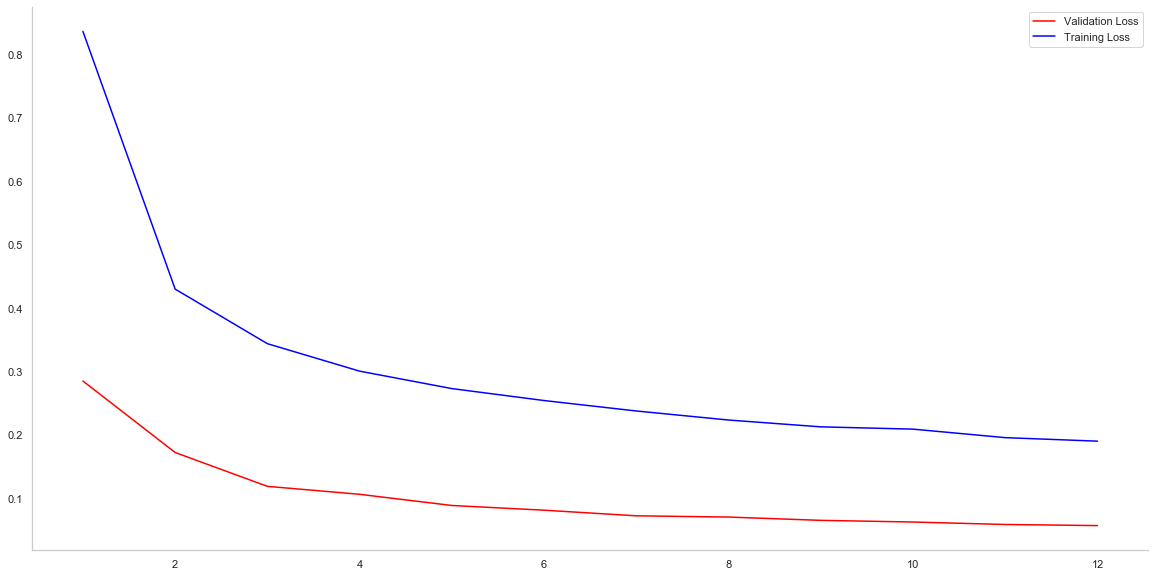

In [150]:
import numpy as np
train_loss = result.history['val_loss'] 
val_loss = result.history['loss']
epochs = list(np.arange(1,nb_epochs+1))
plt.figure(figsize = (20,10))
sns.lineplot(x = epochs,y = train_loss,color = 'red',label = "Validation Loss")
sns.lineplot(x = epochs,y = val_loss,color = 'blue',label = "Training Loss")
plt.grid()
plt.legend()
sns.despine()

# Weights Distribution in Each CNN Layers

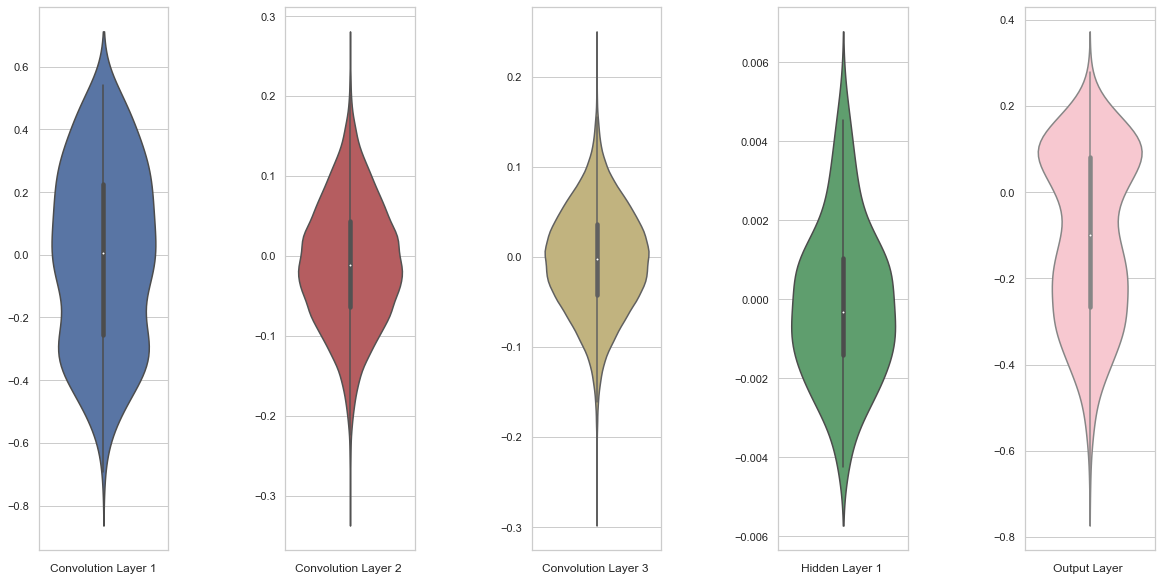

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_1_5.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
h1_w = w_after[19].flatten().reshape(-1,1)
out_2 = w_after[24].flatten().reshape(-1,1)
sns.set(style='whitegrid',palette='RdBu')
fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(1, 5, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(1, 5, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(1, 5, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='g')
plt.xlabel('Hidden Layer 1 ')

plt.subplot(1, 5, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w, color='pink')
plt.xlabel('Output Layer ')

plt.show()

### Model 1 with 3 CNN layers and sigmoid as an activation.

In [30]:
model_1_5 = Sequential()
model_1_5.add(Conv2D(16,kernel_size=(5,5),padding='same',input_shape=input_shape,kernel_initializer='glorot_uniform'))
model_1_5.add(BatchNormalization())
model_1_5.add(Activation('sigmoid'))
model_1_5.add(MaxPooling2D(pool_size=(2,2)))
model_1_5.add(Dropout(0.5))
model_1_5.add(Conv2D(32,kernel_size = (5,5),padding='same',kernel_initializer='glorot_uniform'))
model_1_5.add(BatchNormalization())
model_1_5.add(Activation('sigmoid'))
model_1_5.add(MaxPooling2D(pool_size =(2,2)))
model_1_5.add(Dropout(0.5))
model_1_5.add(Conv2D(32,kernel_size=(5,5),padding='valid',kernel_initializer='glorot_uniform'))
model_1_5.add(BatchNormalization())
model_1_5.add(Activation('sigmoid'))
model_1_5.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_1_5.add(Dropout(0.5))
model_1_5.add(Flatten())
model_1_5.add(Dense(64,kernel_initializer='glorot_uniform'))
model_1_5.add(BatchNormalization())
model_1_5.add(Activation('sigmoid'))
model_1_5.add(Dropout(0.5))
model_1_5.add(Dense(out_dim,activation = 'softmax'))
model_1_5.summary()
 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
batch_normalization_33 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
activation_33 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 32)        12832     
_________________________________________________________________
batch_normalization_34 (Batc (None, 14, 14, 32)        128       
__________

In [31]:
model_1_5.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
result = model_1_5.fit(X_train,y_train,batch_size=batch_size,epochs=12,validation_data=(X_test,y_test))
score = model_1_5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 91s 2ms/step - loss: 2.1381 - acc: 0.2393 - val_loss: 1.1863 - val_acc: 0.7140
Epoch 2/12
60000/60000 [==============================] - 84s 1ms/step - loss: 1.2663 - acc: 0.5702 - val_loss: 0.5486 - val_acc: 0.9032
Epoch 3/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.8289 - acc: 0.7325 - val_loss: 0.2746 - val_acc: 0.9472
Epoch 4/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.6040 - acc: 0.8125 - val_loss: 0.1592 - val_acc: 0.9614
Epoch 5/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.4726 - acc: 0.8572 - val_loss: 0.1207 - val_acc: 0.9656
Epoch 6/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.4027 - acc: 0.8809 - val_loss: 0.0923 - val_acc: 0.9724
Epoch 7/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.3512 - acc: 0.8970 - val_loss: 0.0802 - val_acc

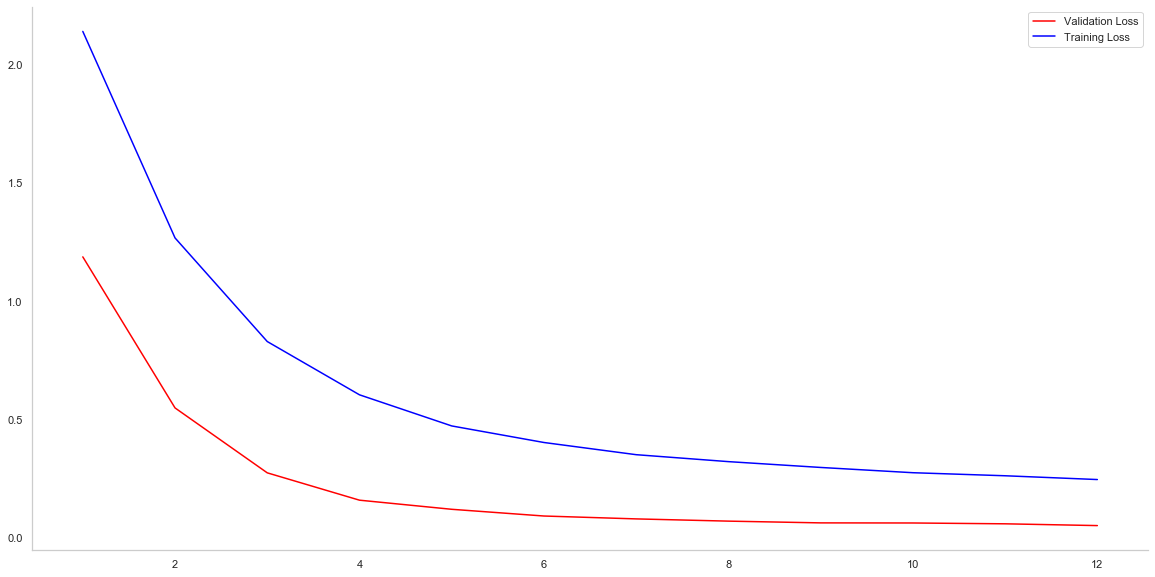

In [32]:
import numpy as np
train_loss = result.history['val_loss'] 
val_loss = result.history['loss']
epochs = list(np.arange(1,nb_epochs+1))
plt.figure(figsize = (20,10))
sns.lineplot(x = epochs,y = train_loss,color = 'red',label = "Validation Loss")
sns.lineplot(x = epochs,y = val_loss,color = 'blue',label = "Training Loss")
plt.grid()
plt.legend()
sns.despine()

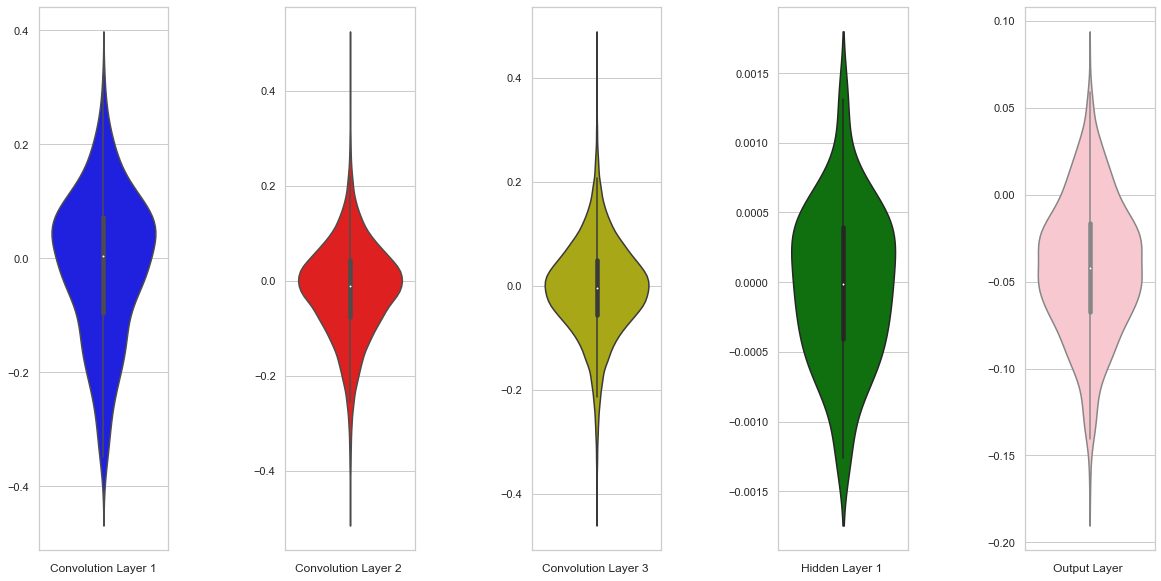

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_1_5.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
h1_w = w_after[19].flatten().reshape(-1,1)
out_2 = w_after[24].flatten().reshape(-1,1)
sns.set(style='whitegrid',palette='RdBu')
fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(1, 5, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(1, 5, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(1, 5, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='g')
plt.xlabel('Hidden Layer 1 ')

plt.subplot(1, 5, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w, color='pink')
plt.xlabel('Output Layer ')

plt.show()

## Model with 5 CNN layers

In [154]:
model_2_5 = Sequential()
model_2_5.add(Conv2D(32,kernel_size=(5,5),padding='same',input_shape=input_shape,kernel_initializer='he_uniform'))
model_2_5.add(BatchNormalization())
model_2_5.add(Activation('relu'))
#model_2_5.add(MaxPooling2D(pool_size=(2,2)))
model_2_5.add(Dropout(0.5))
model_2_5.add(Conv2D(32,kernel_size = (5,5),padding='valid',kernel_initializer='he_uniform'))
model_2_5.add(BatchNormalization())
model_2_5.add(Activation('relu'))
model_2_5.add(MaxPooling2D(pool_size =(2,2)))
model_2_5.add(Dropout(0.5))
model_2_5.add(Conv2D(64,kernel_size=(5,5),padding='same',kernel_initializer='he_uniform'))
model_2_5.add(BatchNormalization())
model_2_5.add(Activation('relu'))
#model_2_5.add(MaxPooling2D(pool_size=(2,2)))
model_2_5.add(Dropout(0.5))
model_2_5.add(Conv2D(64,kernel_size = (5,5),padding = 'valid',kernel_initializer='he_uniform'))
model_2_5.add(BatchNormalization())
model_2_5.add(Activation('relu'))
model_2_5.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_2_5.add(Dropout(0.5))
model_2_5.add(Conv2D(128,kernel_size = (5,5),padding = 'same',kernel_initializer='he_uniform'))
model_2_5.add(BatchNormalization())
model_2_5.add(Activation('relu'))
model_2_5.add(MaxPooling2D(pool_size=(2,2)))
model_2_5.add(Dropout(0.5))
model_2_5.add(Flatten())
model_2_5.add(Dense(32,kernel_initializer='he_uniform'))
model_2_5.add(BatchNormalization())
model_2_5.add(Activation('relu'))
model_2_5.add(Dropout(0.5))
model_2_5.add(Dense(out_dim,activation = 'softmax'))
model_2_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_60 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
activation_60 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 32)        25632     
_________________________________________________________________
batch_normalization_61 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_61 (Activation)   (None, 24, 24, 32)        0         
__________

In [155]:
model_2_5.compile(loss = 'categorical_crossentropy',optimizer = 'RMSprop',metrics = ['accuracy'])
result = model_2_5.fit(X_train,y_train,batch_size=batch_size,epochs=12,validation_data=(X_test,y_test))
score = model_2_5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 259s 4ms/step - loss: 0.9031 - acc: 0.7214 - val_loss: 0.2779 - val_acc: 0.9191
Epoch 2/12
60000/60000 [==============================] - 244s 4ms/step - loss: 0.2654 - acc: 0.9251 - val_loss: 0.0771 - val_acc: 0.9771
Epoch 3/12
60000/60000 [==============================] - 246s 4ms/step - loss: 0.1859 - acc: 0.9473 - val_loss: 0.0383 - val_acc: 0.9891
Epoch 4/12
60000/60000 [==============================] - 241s 4ms/step - loss: 0.1547 - acc: 0.9568 - val_loss: 0.0323 - val_acc: 0.9913
Epoch 5/12
60000/60000 [==============================] - 238s 4ms/step - loss: 0.1336 - acc: 0.9623 - val_loss: 0.0295 - val_acc: 0.9922
Epoch 6/12
60000/60000 [==============================] - 249s 4ms/step - loss: 0.1291 - acc: 0.9645 - val_loss: 0.0421 - val_acc: 0.9902
Epoch 7/12
60000/60000 [==============================] - 251s 4ms/step - loss: 0.1219 - acc: 0.9674 - val_loss: 0.0330 - 

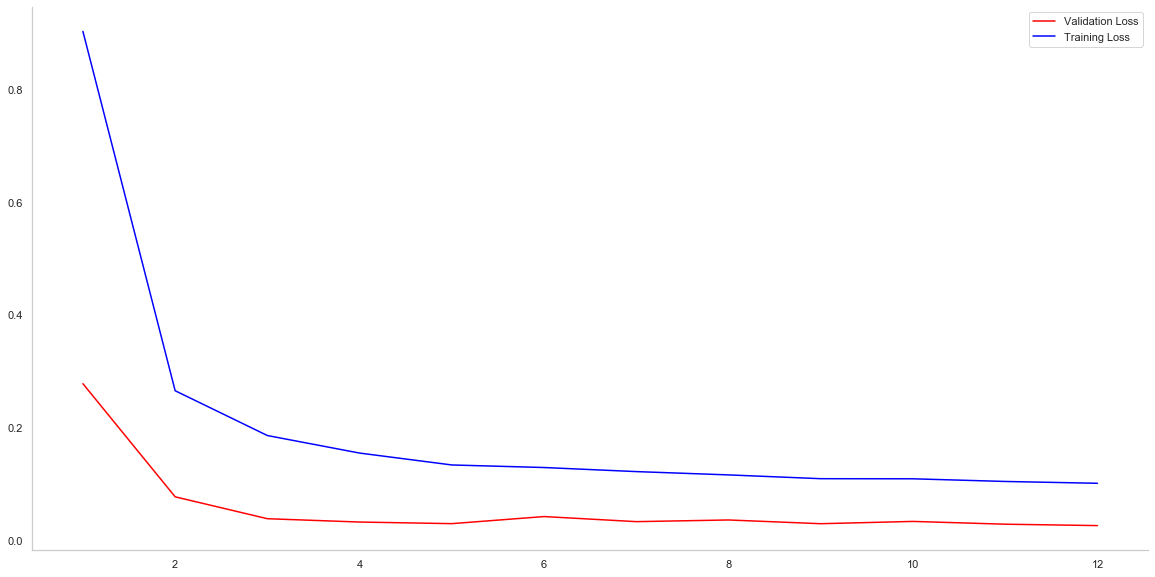

In [156]:
import numpy as np
train_loss = result.history['val_loss'] 
val_loss = result.history['loss']
epochs = list(np.arange(1,nb_epochs+1))
plt.figure(figsize = (20,10))
sns.lineplot(x = epochs,y = train_loss,color = 'red',label = "Validation Loss")
sns.lineplot(x = epochs,y = val_loss,color = 'blue',label = "Training Loss")
plt.grid()
plt.legend()
sns.despine()

# Weights Distribution in Each CNN Layers

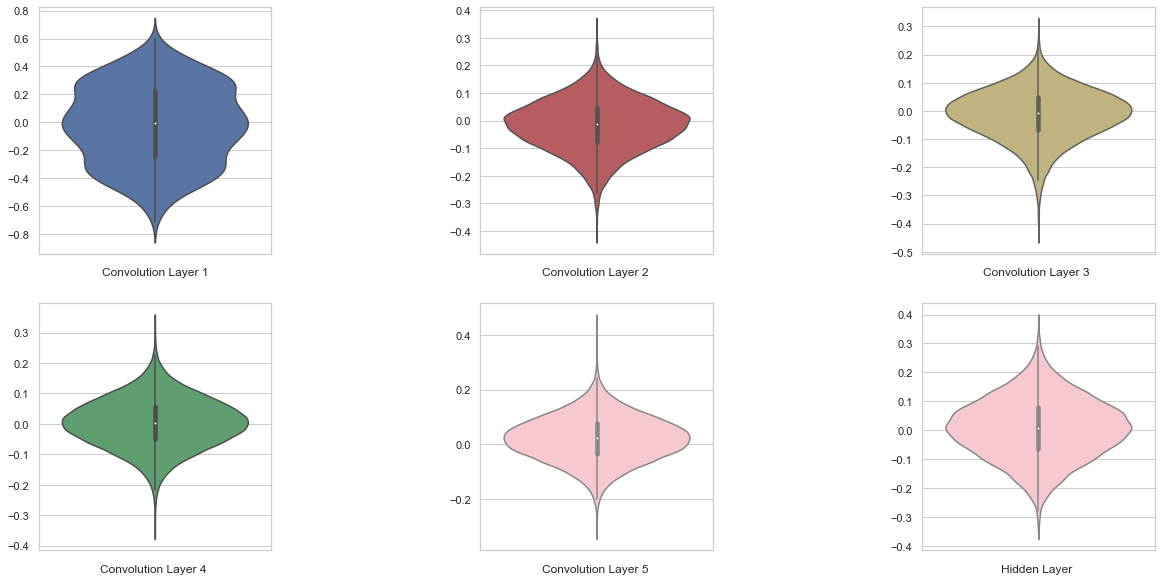

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_2_5.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
C4_w = w_after[18].flatten().reshape(-1,1)
C5_w = w_after[24].flatten().reshape(-1,1)
h1_w = w_after[30].flatten().reshape(-1,1)
out_w = w_after[36].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(2, 3, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(2, 3, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(2, 3, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C4_w, color='g')
plt.xlabel('Convolution Layer 4 ')

plt.subplot(2, 3, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C5_w, color='pink')
plt.xlabel('Convolution Layer 5 ')

plt.subplot(2, 3, 6)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='pink')
plt.xlabel('Hidden Layer ')
plt.show()

## Model 3 with 7 CNN layers

In [159]:
model_3_5 = Sequential()
model_3_5.add(Conv2D(10,kernel_size=(5,5),padding='same',input_shape=input_shape,kernel_initializer='he_uniform'))
model_3_5.add(BatchNormalization())
model_3_5.add(Activation('relu'))
model_3_5.add(MaxPooling2D(pool_size=(2,2),padding = 'valid'))
model_3_5.add(Dropout(0.5))
model_3_5.add(Conv2D(32,kernel_size = (5,5),padding='same',kernel_initializer='he_uniform'))
model_3_5.add(BatchNormalization())
model_3_5.add(Activation('relu'))
#model_3_5.add(MaxPooling2D(pool_size =(2,2)))
model_3_5.add(Dropout(0.5))
model_3_5.add(Conv2D(32,kernel_size=(5,5),padding='same',kernel_initializer='he_uniform'))
model_3_5.add(BatchNormalization())
model_3_5.add(Activation('relu'))
#model_3_5.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_3_5.add(Dropout(0.5))
model_3_5.add(Conv2D(32,kernel_size = (5,5),padding = 'same',kernel_initializer='he_uniform'))
model_3_5.add(BatchNormalization())
model_3_5.add(Activation('relu'))
model_3_5.add(MaxPooling2D(pool_size=(2,2)))
model_3_5.add(Dropout(0.5))
model_3_5.add(Conv2D(64,kernel_size = (5,5),padding = 'same',kernel_initializer='he_uniform'))
model_3_5.add(BatchNormalization())
model_3_5.add(Activation('relu'))
#model_3_5.add(MaxPooling2D(pool_size=(2,2)))
model_3_5.add(Dropout(0.5))
model_3_5.add(Conv2D(64,kernel_size = (5,5),padding = 'same',kernel_initializer='he_uniform'))
model_3_5.add(BatchNormalization())
model_3_5.add(Activation('relu'))
#model_3_5.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_3_5.add(Dropout(0.5))
model_3_5.add(Conv2D(64,kernel_size = (5,5),padding = 'valid',kernel_initializer='he_uniform'))
model_3_5.add(BatchNormalization())
model_3_5.add(Activation('relu'))
model_3_5.add(MaxPooling2D(pool_size=(2,2),padding = 'same'))
model_3_5.add(Dropout(0.5))
model_3_5.add(Flatten())
model_3_5.add(Dense(128,kernel_initializer='he_uniform'))
model_3_5.add(BatchNormalization())
model_3_5.add(Activation('relu'))
model_3_5.add(Dropout(0.5))
model_3_5.add(Dense(out_dim,activation = 'softmax'))
model_3_5.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 28, 28, 10)        260       
_________________________________________________________________
batch_normalization_73 (Batc (None, 28, 28, 10)        40        
_________________________________________________________________
activation_73 (Activation)   (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 10)        0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 14, 14, 32)        8032      
_________________________________________________________________
batch_normalization_74 (Batc (None, 14, 14, 32)        128       
__________

In [160]:
model_3_5.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
result = model_3_5.fit(X_train,y_train,batch_size=batch_size,epochs=12,validation_data=(X_test,y_test))
score = model_3_5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 195s 3ms/step - loss: 1.6159 - acc: 0.4320 - val_loss: 2.0662 - val_acc: 0.4915
Epoch 2/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.6132 - acc: 0.7983 - val_loss: 0.4509 - val_acc: 0.8596
Epoch 3/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.3424 - acc: 0.8968 - val_loss: 0.1894 - val_acc: 0.9425
Epoch 4/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.2482 - acc: 0.9270 - val_loss: 0.0860 - val_acc: 0.9738
Epoch 5/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.1969 - acc: 0.9419 - val_loss: 0.0675 - val_acc: 0.9801
Epoch 6/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.1688 - acc: 0.9508 - val_loss: 0.0531 - val_acc: 0.9823
Epoch 7/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1497 - acc: 0.9572 - val_loss: 0.0646 - 

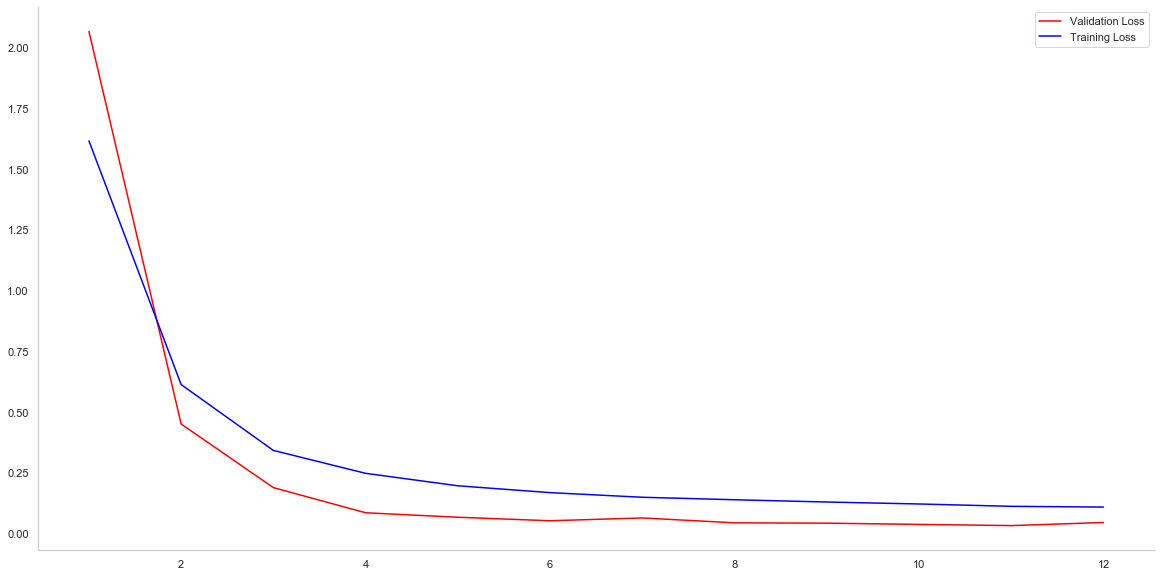

In [161]:
import numpy as np
train_loss = result.history['val_loss'] 
val_loss = result.history['loss']
epochs = list(np.arange(1,nb_epochs+1))
plt.figure(figsize = (20,10))
sns.lineplot(x = epochs,y = train_loss,color = 'red',label = "Validation Loss")
sns.lineplot(x = epochs,y = val_loss,color = 'blue',label = "Training Loss")
plt.grid()
plt.legend()
sns.despine()

# Weights Distribution in Each CNN Layers

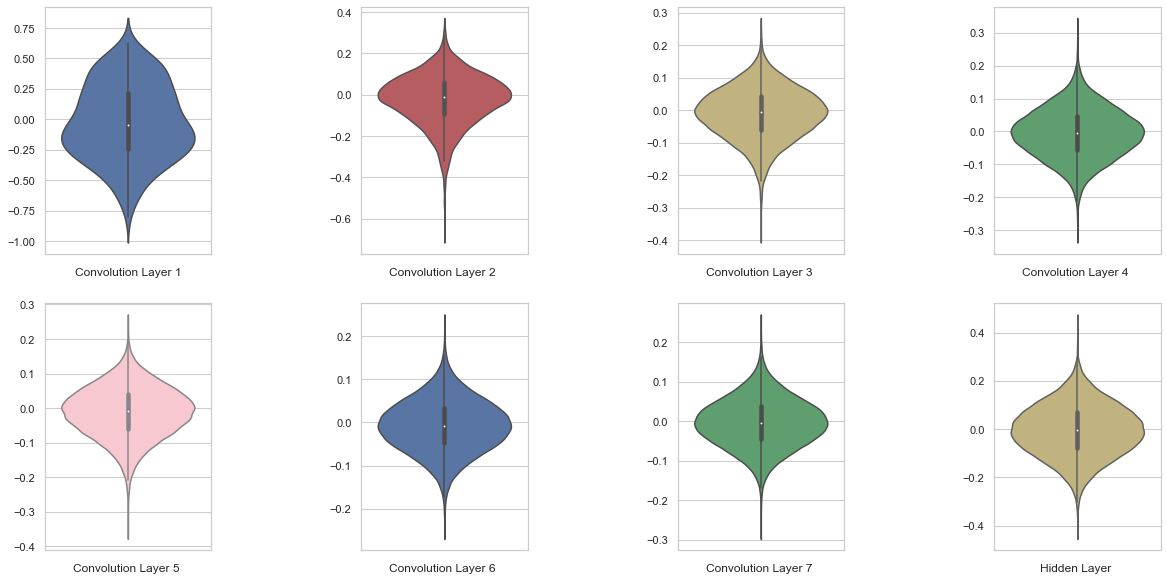

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_3_5.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
C4_w = w_after[18].flatten().reshape(-1,1)
C5_w = w_after[24].flatten().reshape(-1,1)
C6_w = w_after[30].flatten().reshape(-1,1)
C7_w = w_after[36].flatten().reshape(-1,1)
h1_w = w_after[42].flatten().reshape(-1,1)
out_w = w_after[48].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(2, 4, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(2, 4, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(2, 4, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(2, 4, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C4_w, color='g')
plt.xlabel('Convolution Layer 4 ')

plt.subplot(2, 4, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C5_w, color='pink')
plt.xlabel('Convolution Layer 5 ')

plt.subplot(2, 4, 6)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C6_w, color='b')
plt.xlabel('Convolution Layer 6 ')
plt.subplot(2, 4, 7)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C7_w, color='g')
plt.xlabel('Convolution Layer 7 ')

plt.subplot(2, 4, 8)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='y')
plt.xlabel('Hidden Layer ')
plt.show()

## Models with 7 by 7 kernels or filters

### Model 1 with 3 CNN layers

In [165]:
model_1_7 = Sequential()
model_1_7.add(Conv2D(10,kernel_size=(7,7),padding='valid',input_shape=input_shape,kernel_initializer='he_uniform'))
model_1_7.add(BatchNormalization())
model_1_7.add(Activation('relu'))
model_1_7.add(MaxPooling2D(pool_size=(2,2),padding = 'same',strides=(1,1)))
model_1_7.add(Dropout(0.5))
model_1_7.add(Conv2D(32,kernel_size = (7,7),padding='valid',kernel_initializer='he_uniform'))
model_1_7.add(BatchNormalization())
model_1_7.add(Activation('relu'))
#model_1_7.add(MaxPooling2D(pool_size =(2,2)))
model_1_7.add(Dropout(0.5))
model_1_7.add(Conv2D(32,kernel_size=(7,7),padding='valid',kernel_initializer='he_uniform'))
model_1_7.add(BatchNormalization())
model_1_7.add(Activation('relu'))
model_1_7.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
model_1_7.add(Dropout(0.5))
model_1_7.add(Flatten())
model_1_7.add(Dense(64,kernel_initializer='he_uniform'))
model_1_7.add(BatchNormalization())
model_1_7.add(Activation('relu'))
model_1_7.add(Dropout(0.5))
model_1_7.add(Dense(out_dim,activation = 'softmax'))
model_1_7.summary()
 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 22, 22, 10)        500       
_________________________________________________________________
batch_normalization_85 (Batc (None, 22, 22, 10)        40        
_________________________________________________________________
activation_85 (Activation)   (None, 22, 22, 10)        0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 22, 22, 10)        0         
_________________________________________________________________
dropout_81 (Dropout)         (None, 22, 22, 10)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 16, 16, 32)        15712     
_________________________________________________________________
batch_normalization_86 (Batc (None, 16, 16, 32)        128       
__________

In [166]:
model_1_7.compile(loss = 'categorical_crossentropy',optimizer = 'adadelta',metrics = ['accuracy'])
result = model_1_7.fit(X_train,y_train,batch_size=batch_size,epochs=12,validation_data=(X_test,y_test))
score = model_1_7.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.6765 - acc: 0.7924 - val_loss: 0.1134 - val_acc: 0.9664
Epoch 2/12
60000/60000 [==============================] - 158s 3ms/step - loss: 0.2062 - acc: 0.9414 - val_loss: 0.0524 - val_acc: 0.9840
Epoch 3/12
60000/60000 [==============================] - 154s 3ms/step - loss: 0.1445 - acc: 0.9592 - val_loss: 0.0470 - val_acc: 0.9851
Epoch 4/12
60000/60000 [==============================] - 142s 2ms/step - loss: 0.1199 - acc: 0.9660 - val_loss: 0.0367 - val_acc: 0.9887
Epoch 5/12
60000/60000 [==============================] - 132s 2ms/step - loss: 0.1041 - acc: 0.9709 - val_loss: 0.0327 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0946 - acc: 0.9732 - val_loss: 0.0292 - val_acc: 0.9903
Epoch 7/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0868 - acc: 0.9764 - val_loss: 0.0259 - 

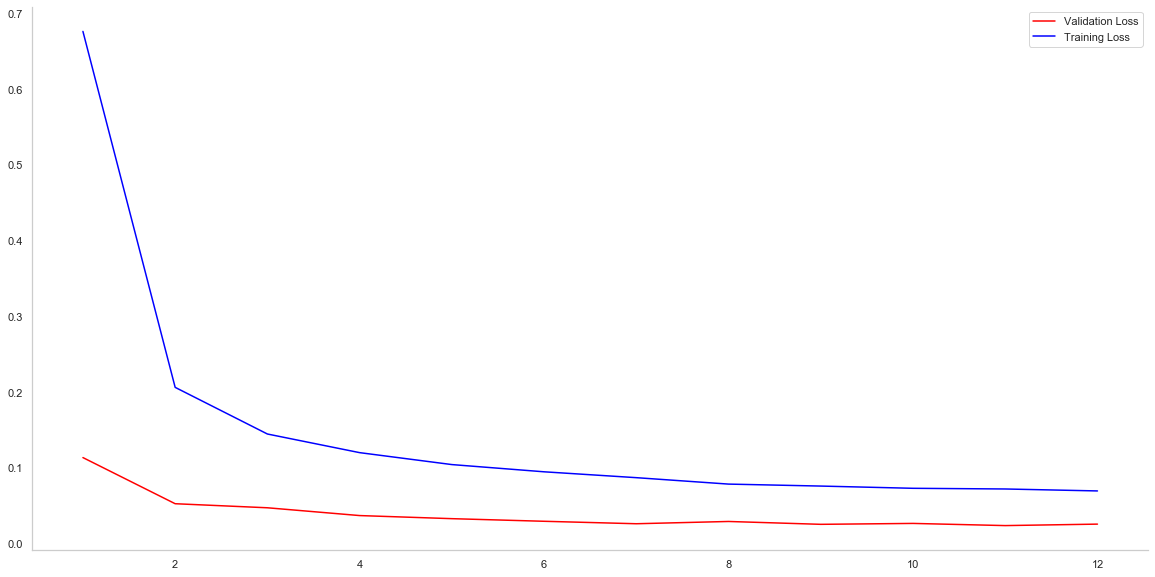

In [167]:
import numpy as np
train_loss = result.history['val_loss'] 
val_loss = result.history['loss']
epochs = list(np.arange(1,nb_epochs+1))
plt.figure(figsize = (20,10))
sns.lineplot(x = epochs,y = train_loss,color = 'red',label = "Validation Loss")
sns.lineplot(x = epochs,y = val_loss,color = 'blue',label = "Training Loss")
plt.grid()
plt.legend()
sns.despine()

# Weights Distribution in Each CNN Layers

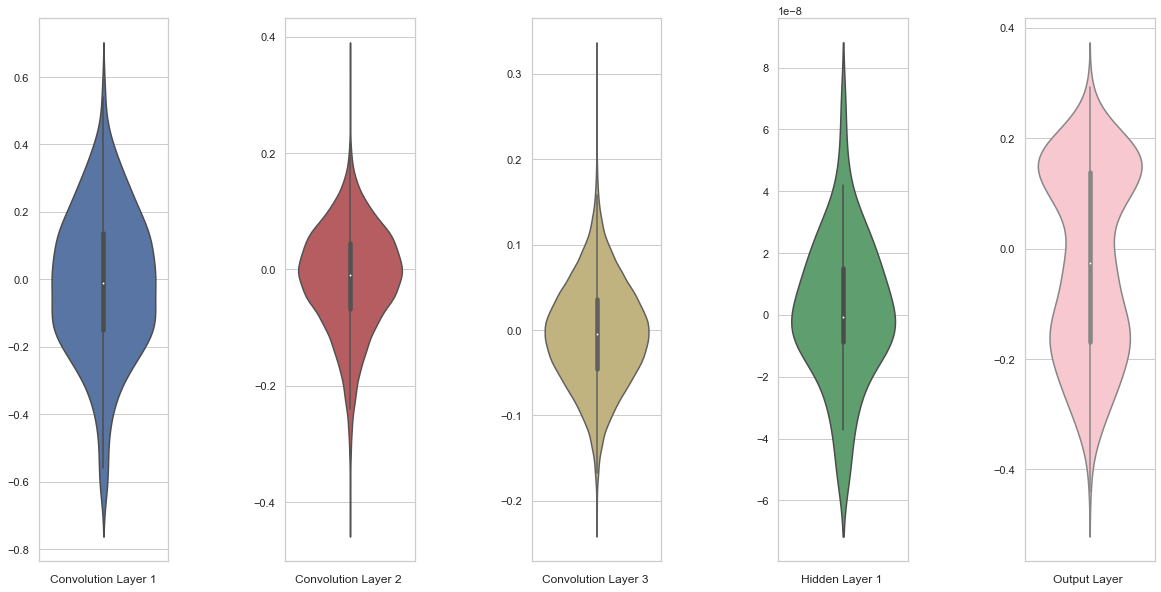

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_1_7.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
h1_w = w_after[19].flatten().reshape(-1,1)
out_2 = w_after[24].flatten().reshape(-1,1)
sns.set(style='whitegrid',palette='RdBu')
fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(1, 5, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(1, 5, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(1, 5, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='g')
plt.xlabel('Hidden Layer 1 ')

plt.subplot(1, 5, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w, color='pink')
plt.xlabel('Output Layer ')

plt.show()

## Model 2 with 5 CNN Layers

In [169]:
model_2_7 = Sequential()
model_2_7.add(Conv2D(10,kernel_size=(7,7),padding='same',input_shape=input_shape,kernel_initializer='he_uniform'))
model_2_7.add(BatchNormalization())
model_2_7.add(Activation('relu'))
model_2_7.add(MaxPooling2D(pool_size=(2,2)))
model_2_7.add(Dropout(0.5))
model_2_7.add(Conv2D(24,kernel_size = (7,7),padding='valid',kernel_initializer='he_uniform'))
model_2_7.add(BatchNormalization())
model_2_7.add(Activation('relu'))
#model_2_7.add(MaxPooling2D(pool_size =(2,2)))
model_2_7.add(Dropout(0.5))
model_2_7.add(Conv2D(24,kernel_size=(7,7),padding='same',kernel_initializer='he_uniform'))
model_2_7.add(BatchNormalization())
model_2_7.add(Activation('relu'))
model_2_7.add(MaxPooling2D(pool_size=(2,2)))
model_2_7.add(Dropout(0.5))
model_2_7.add(Conv2D(48,kernel_size = (7,7),padding = 'same',kernel_initializer='he_uniform'))
model_2_7.add(BatchNormalization())
model_2_7.add(Activation('relu'))
#model_2_7.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_2_7.add(Dropout(0.5))
model_2_7.add(Conv2D(48,kernel_size = (7,7),padding = 'same',kernel_initializer='he_uniform'))
model_2_7.add(BatchNormalization())
model_2_7.add(Activation('relu'))
model_2_7.add(MaxPooling2D(pool_size=(2,2)))
model_2_7.add(Dropout(0.5))
model_2_7.add(Flatten())
model_2_7.add(Dense(32,kernel_initializer='he_uniform'))
model_2_7.add(BatchNormalization())
model_2_7.add(Activation('relu'))
model_2_7.add(Dropout(0.5))
model_2_7.add(Dense(out_dim,activation = 'softmax'))
model_2_7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 28, 28, 10)        500       
_________________________________________________________________
batch_normalization_89 (Batc (None, 28, 28, 10)        40        
_________________________________________________________________
activation_89 (Activation)   (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 10)        0         
_________________________________________________________________
dropout_85 (Dropout)         (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 8, 8, 24)          11784     
_________________________________________________________________
batch_normalization_90 (Batc (None, 8, 8, 24)          96        
__________

In [170]:
model_2_7.compile(loss = 'categorical_crossentropy',optimizer = 'adadelta',metrics = ['accuracy'])
result = model_2_7.fit(X_train,y_train,batch_size=batch_size,epochs=12,validation_data=(X_test,y_test))
score = model_2_7.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 134s 2ms/step - loss: 1.4689 - acc: 0.4953 - val_loss: 0.5733 - val_acc: 0.8321
Epoch 2/12
60000/60000 [==============================] - 95s 2ms/step - loss: 0.5746 - acc: 0.8331 - val_loss: 0.1497 - val_acc: 0.9582
Epoch 3/12
60000/60000 [==============================] - 112s 2ms/step - loss: 0.3679 - acc: 0.9029 - val_loss: 0.0826 - val_acc: 0.9774
Epoch 4/12
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2930 - acc: 0.9236 - val_loss: 0.0791 - val_acc: 0.9797
Epoch 5/12
60000/60000 [==============================] - 92s 2ms/step - loss: 0.2555 - acc: 0.9338 - val_loss: 0.0610 - val_acc: 0.9845
Epoch 6/12
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2304 - acc: 0.9404 - val_loss: 0.0663 - val_acc: 0.9843
Epoch 7/12
60000/60000 [==============================] - 97s 2ms/step - loss: 0.2162 - acc: 0.9440 - val_loss: 0.0534 - val_a

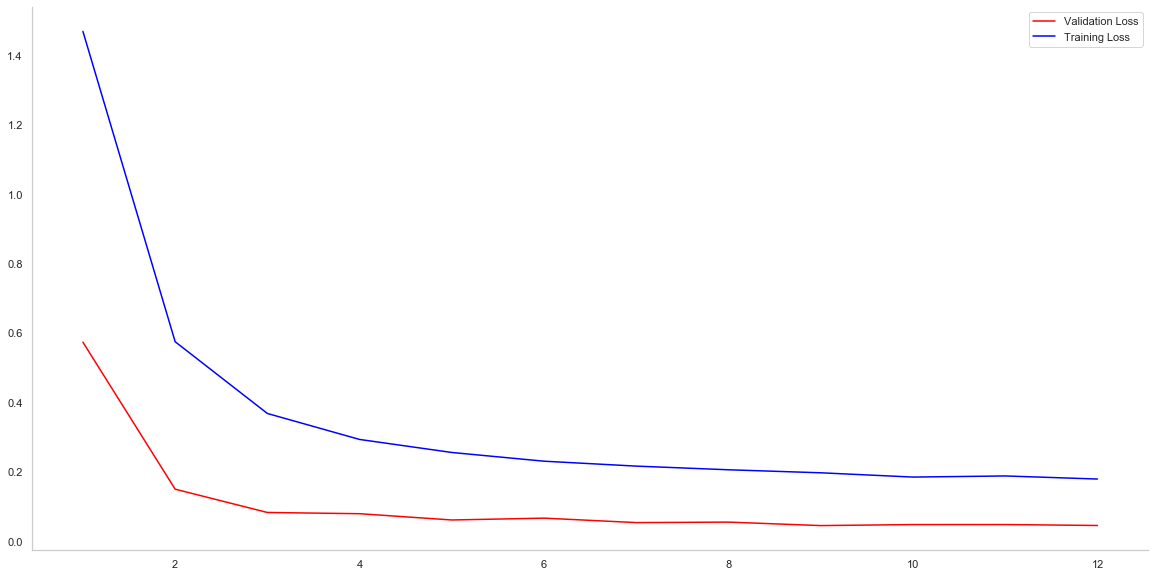

In [171]:
import numpy as np
train_loss = result.history['val_loss'] 
val_loss = result.history['loss']
epochs = list(np.arange(1,nb_epochs+1))
plt.figure(figsize = (20,10))
sns.lineplot(x = epochs,y = train_loss,color = 'red',label = "Validation Loss")
sns.lineplot(x = epochs,y = val_loss,color = 'blue',label = "Training Loss")
plt.grid()
plt.legend()
sns.despine()

# Weights Distribution in Each CNN Layers

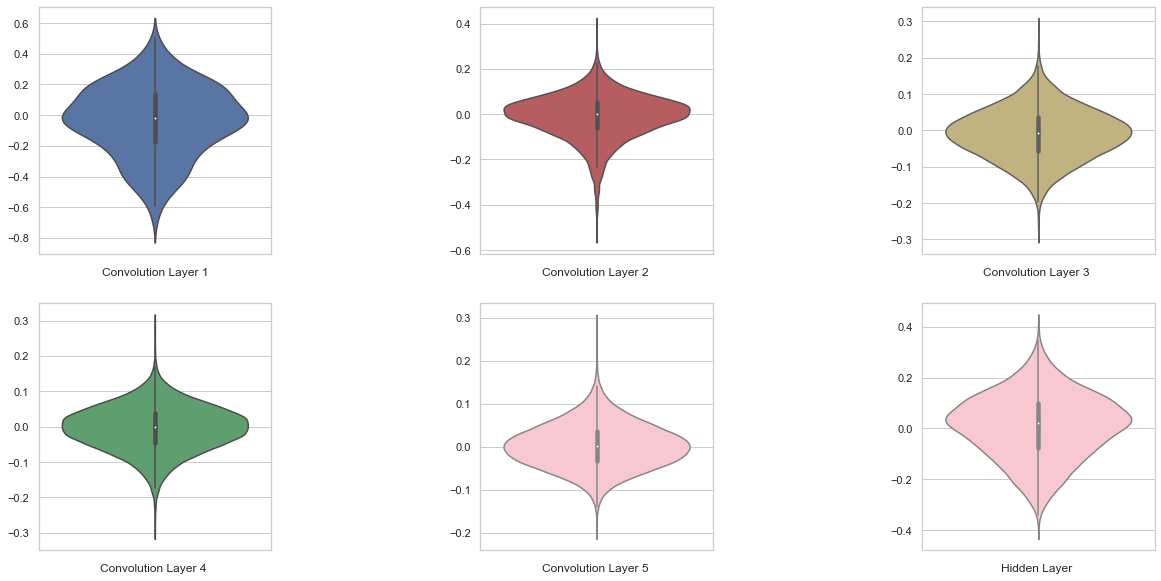

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_2_7.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
C4_w = w_after[18].flatten().reshape(-1,1)
C5_w = w_after[24].flatten().reshape(-1,1)
h1_w = w_after[30].flatten().reshape(-1,1)
out_w = w_after[36].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(2, 3, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(2, 3, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(2, 3, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C4_w, color='g')
plt.xlabel('Convolution Layer 4 ')

plt.subplot(2, 3, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C5_w, color='pink')
plt.xlabel('Convolution Layer 5 ')

plt.subplot(2, 3, 6)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='pink')
plt.xlabel('Hidden Layer ')
plt.show()

## Model 3 with 7 CNN Layers

In [174]:
model_3_7 = Sequential()
model_3_7.add(Conv2D(16,kernel_size=(7,7),padding='valid',input_shape=input_shape,kernel_initializer='he_uniform'))
model_3_7.add(BatchNormalization())
model_3_7.add(Activation('relu'))
model_3_7.add(MaxPooling2D(pool_size=(2,2),padding = 'valid'))
model_3_7.add(Dropout(0.5))
model_3_7.add(Conv2D(32,kernel_size = (7,7),padding='same',kernel_initializer='he_uniform'))
model_3_7.add(BatchNormalization())
model_3_7.add(Activation('relu'))
#model_3_7.add(MaxPooling2D(pool_size =(2,2)))
model_3_7.add(Dropout(0.5))
model_3_7.add(Conv2D(32,kernel_size=(7,7),padding='same',kernel_initializer='he_uniform'))
model_3_7.add(BatchNormalization())
model_3_7.add(Activation('relu'))
#model_3_7.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_3_7.add(Dropout(0.5))
model_3_7.add(Conv2D(32,kernel_size = (7,7),padding = 'same',kernel_initializer='he_uniform'))
model_3_7.add(BatchNormalization())
model_3_7.add(Activation('relu'))
model_3_7.add(MaxPooling2D(pool_size=(2,2)))
model_3_7.add(Dropout(0.5))
model_3_7.add(Conv2D(64,kernel_size = (7,7),padding = 'same',kernel_initializer='he_uniform'))
model_3_7.add(BatchNormalization())
model_3_7.add(Activation('relu'))
#model_3_7.add(MaxPooling2D(pool_size=(2,2)))
model_3_7.add(Dropout(0.5))
model_3_7.add(Conv2D(64,kernel_size = (7,7),padding = 'same',kernel_initializer='he_uniform'))
model_3_7.add(BatchNormalization())
model_3_7.add(Activation('relu'))
#model_3_7.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model_3_7.add(Dropout(0.5))
model_3_7.add(Conv2D(64,kernel_size = (7,7),padding = 'same',kernel_initializer='he_uniform'))
model_3_7.add(BatchNormalization())
model_3_7.add(Activation('relu'))
model_3_7.add(MaxPooling2D(pool_size=(2,2),padding = 'valid'))
model_3_7.add(Dropout(0.5))
model_3_7.add(Flatten())
model_3_7.add(Dense(32,kernel_initializer='he_uniform'))
model_3_7.add(BatchNormalization())
model_3_7.add(Activation('relu'))
model_3_7.add(Dropout(0.5))
model_3_7.add(Dense(out_dim,activation = 'softmax'))
model_3_7.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 22, 22, 16)        800       
_________________________________________________________________
batch_normalization_103 (Bat (None, 22, 22, 16)        64        
_________________________________________________________________
activation_103 (Activation)  (None, 22, 22, 16)        0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
dropout_99 (Dropout)         (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 11, 11, 32)        25120     
_________________________________________________________________
batch_normalization_104 (Bat (None, 11, 11, 32)        128       
__________

In [175]:
model_3_7.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
result = model_3_7.fit(X_train,y_train,batch_size=batch_size,epochs=12,validation_data=(X_test,y_test))
score = model_3_7.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 226s 4ms/step - loss: 1.7923 - acc: 0.3654 - val_loss: 1.9683 - val_acc: 0.3683
Epoch 2/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.6775 - acc: 0.7896 - val_loss: 0.2738 - val_acc: 0.9307
Epoch 3/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.3548 - acc: 0.9094 - val_loss: 0.2052 - val_acc: 0.9500
Epoch 4/12
60000/60000 [==============================] - 173s 3ms/step - loss: 0.2588 - acc: 0.9371 - val_loss: 0.0673 - val_acc: 0.9846
Epoch 5/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.2204 - acc: 0.9454 - val_loss: 0.0528 - val_acc: 0.9866
Epoch 6/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.1910 - acc: 0.9528 - val_loss: 0.0382 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.1739 - acc: 0.9578 - val_loss: 0.0408 - 

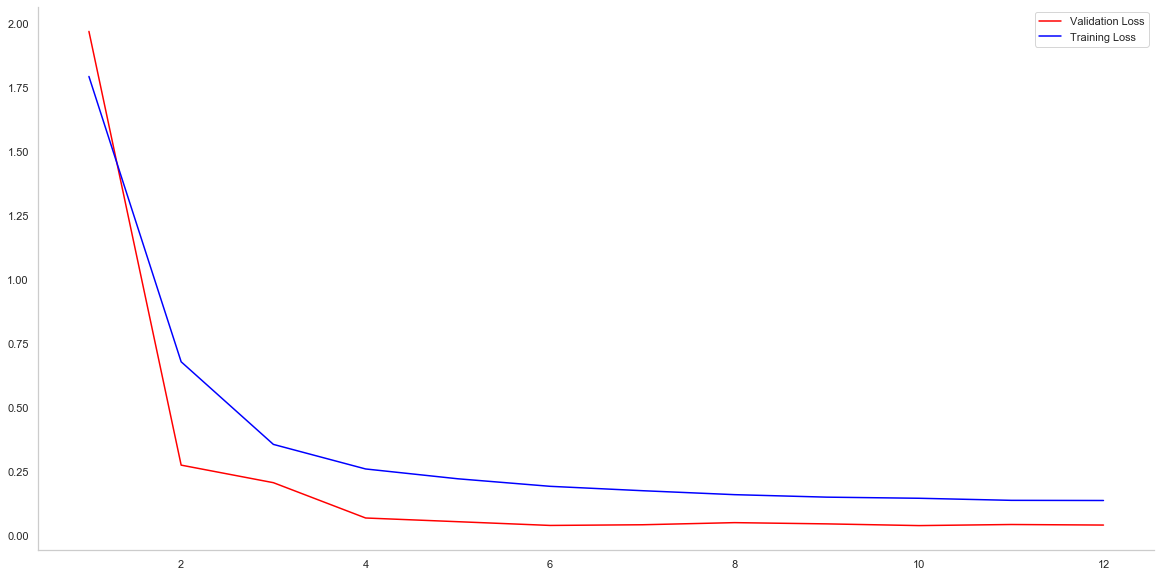

In [176]:
import numpy as np
train_loss = result.history['val_loss'] 
val_loss = result.history['loss']
epochs = list(np.arange(1,nb_epochs+1))
plt.figure(figsize = (20,10))
sns.lineplot(x = epochs,y = train_loss,color = 'red',label = "Validation Loss")
sns.lineplot(x = epochs,y = val_loss,color = 'blue',label = "Training Loss")
plt.grid()
plt.legend()
sns.despine()

### Weights Distribution in Each CNN Layers

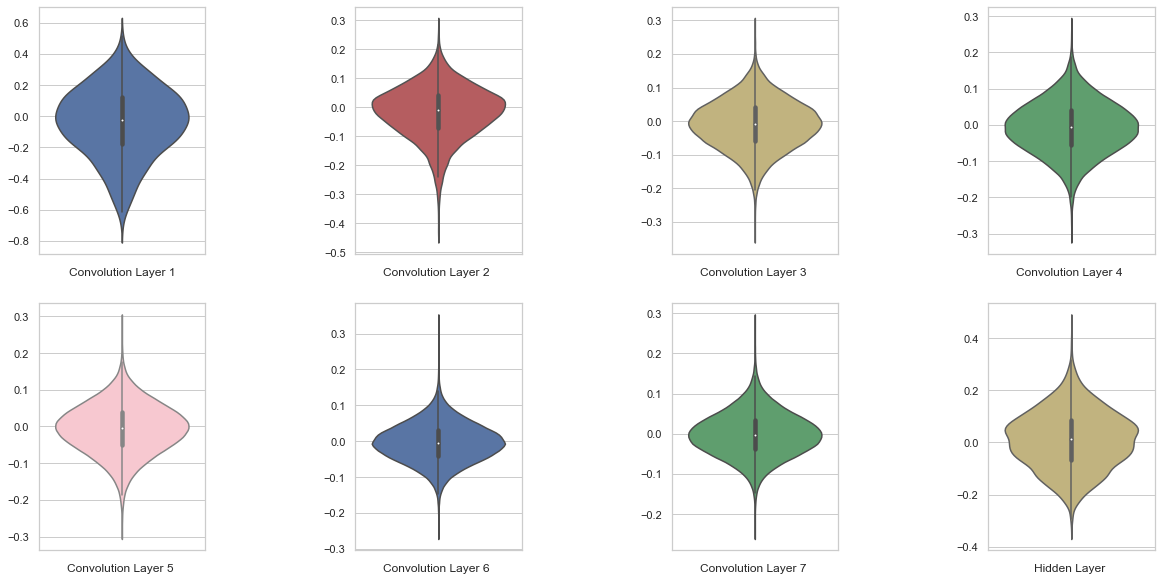

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = model_3_7.get_weights()

C1_w = w_after[0].flatten().reshape(-1,1)
C2_w = w_after[6].flatten().reshape(-1,1)
C3_w = w_after[12].flatten().reshape(-1,1)
C4_w = w_after[18].flatten().reshape(-1,1)
C5_w = w_after[24].flatten().reshape(-1,1)
C6_w = w_after[30].flatten().reshape(-1,1)
C7_w = w_after[36].flatten().reshape(-1,1)
h1_w = w_after[42].flatten().reshape(-1,1)
out_w = w_after[48].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
#plt.title("Weight matrices after model trained")
plt.subplot(2, 4, 1)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C1_w,color='b')
plt.xlabel('Convolution Layer 1')

plt.subplot(2, 4, 2)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C2_w, color='r')
plt.xlabel('Convolution Layer 2 ')

plt.subplot(2, 4, 3)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C3_w,color='y')
plt.xlabel('Convolution Layer 3 ')
plt.subplots_adjust(wspace=0.9)

plt.subplot(2, 4, 4)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C4_w, color='g')
plt.xlabel('Convolution Layer 4 ')

plt.subplot(2, 4, 5)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C5_w, color='pink')
plt.xlabel('Convolution Layer 5 ')

plt.subplot(2, 4, 6)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C6_w, color='b')
plt.xlabel('Convolution Layer 6 ')
plt.subplot(2, 4, 7)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=C7_w, color='g')
plt.xlabel('Convolution Layer 7 ')

plt.subplot(2, 4, 8)
#plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w, color='y')
plt.xlabel('Hidden Layer ')
plt.show()

In [35]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = ["Model","Kernels size","Initialization","Val_Acc_Score"]

x.add_row(["3 CNN Layer ","3*3","he_normal",0.9912])
x.add_row(["3 CNN Layer ","3*3","glorot_uniform",0.9687])
x.add_row(["3 CNN Layer ","5*5","he_normal",0.9843])
x.add_row(["3 CNN Layer ","5*5","glorot_normal",0.1135])
x.add_row(["3 CNN Layer ","7*7","he_normal",0.9734])
x.add_row(["3 CNN Layer ","7*7","glorot_uniform",0.1135])
x.add_row(["5 CNN Layer ","3*3","he_normal",0.9835])
x.add_row(["5 CNN Layer ","3*3","glorot_normal",0.9827])
x.add_row(["5 CNN Layer ","5*5","glorot_uniform",0.9941])
x.add_row(["5 CNN Layer","7*7","he_uniform",0.9855])
x.add_row(["7 CNN Layer","3*3","he_normal",0.9927])
x.add_row(["7 CNN Layer","5*5","he_normal",0.9891])
x.add_row(["7 CNN Layer","7*7","he_normal",0.9914])


print(x)

+--------------+--------------+----------------+---------------+
|    Model     | Kernels size | Initialization | Val_Acc_Score |
+--------------+--------------+----------------+---------------+
| 3 CNN Layer  |     3*3      |   he_normal    |     0.9912    |
| 3 CNN Layer  |     3*3      | glorot_uniform |     0.9687    |
| 3 CNN Layer  |     5*5      |   he_normal    |     0.9843    |
| 3 CNN Layer  |     5*5      | glorot_normal  |     0.1135    |
| 3 CNN Layer  |     7*7      |   he_normal    |     0.9734    |
| 3 CNN Layer  |     7*7      | glorot_uniform |     0.1135    |
| 5 CNN Layer  |     3*3      |   he_normal    |     0.9835    |
| 5 CNN Layer  |     3*3      | glorot_normal  |     0.9827    |
| 5 CNN Layer  |     5*5      | glorot_uniform |     0.9941    |
| 5 CNN Layer  |     7*7      |   he_uniform   |     0.9855    |
| 7 CNN Layer  |     3*3      |   he_normal    |     0.9927    |
| 7 CNN Layer  |     5*5      |   he_normal    |     0.9891    |
| 7 CNN Layer  |     7*7 

## After doing experiment with CNN with different Layers and kernels ,I interpreted that :-

### 1. CNN layers with sigmoid as an activation layer doesn't give a good accuracy at all or it gives worst accuracy of all of 11.35%.
### 2. Sigmoid activation gives worst result if CNN layers is 5,7 and more but with 3 CNN layers it giving good result as other models.
### 3. The reason can be that as layers increases and with sigmoid activation layer there might be vanishing gradient problem.